<center> <img src="https://miro.medium.com/v2/resize:fit:1200/1*lbDXL0IuitCRz4mpZ7MmfQ.png" width=55% > </center>

<br><br>

<center> 
    <font size="6">Final Lab (Part 2): Image Classification using Convolutional Neural Networks </font>
</center>
<center> 
    <font size="4">Computer Vision 1 University of Amsterdam</font> 
</center>
<center> 
    <font size="4">Due 23:59PM, 24th October, 2025 (Amsterdam time)</font> 
</center>

<br><br>

***

<br><br>

<center>

Student1 ID: Jonas Elzinga \
Student1 Name: 13864149 

Student2 ID: 16235347\
Student2 Name: May Daniel Ben Zion

Student3 ID: 15990834 \
Student3 Name: Vlad Chibulcutean

( Student4 ID: \
Student4 Name: )

</center>

### **Coding Guidelines**

Your code must be handed in this Jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Final Lab: Image Classification Assignment. Please also fill out your names and IDs above.

For full credit, make sure your notebook follows these guidelines:

- Please express your thoughts **concisely**. The number of words does not necessarily correlate with how well you understand the concepts.
- Understand the problem as much as you can. When answering a question, provide evidence (qualitative and/or quantitative results, references to papers, figures, etc.) to support your arguments. Not everything might be explicitly asked for, so think about what might strengthen your arguments to make the notebook self-contained and complete.
- Tables and figures must be accompanied by a **brief** description. Add a number, a title, and, if applicable, the name and unit of variables in a table, and name and unit of axes and legends in a figure.

**Late submissions are not allowed.** Assignments submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance to avoid last-minute system failure issues.

**Environment:** Since this is a project-based assignment, you are free to use any feature descriptor and machine learning tools (e.g., K-means, SVM). You should use Python for your implementation. You are free to use any Python library for this assignment, but make sure to provide a conda environment file!

**Plagiarism Note:** Keep in mind that plagiarism (submitted materials which are not your work) is a serious offense and any misconduct will be addressed according to university regulations. This includes using generative tools such as ChatGPT.

**Ensure that you save all results/answers to the questions (even if you reuse some code).**

### **Report Preparation**

Your tasks include the following:

1. **Report Preparation:** For both parts of the final project, students are expected to prepare a report. The report should include all details on implementation approaches, analysis of results for different settings, and visualizations illustrating experiments and performance of your implementation. Grading will be based on the report, so it should be as self-contained as possible. If the report contains faulty results or ambiguities, TAs can refer to your code for clarification. 

2. **Explanation of Results:** Do not just provide numbers without explanation. Discuss different settings to show your understanding of the material and processes involved.

3. **Quantitative Evaluation:** For quantitative evaluation, you are expected to provide the results based on performance (accuracy, learning loss and learning curves). 

4. **Aim:** Understand the basic Image Classification pipeline using Convolutional Neural Nets (CNN's).

5. **Working on Assignments:** Students should work in assigned groups for **two** weeks. Any questions can be discussed on ED.

    - **Submission:** Submit your source code and report together in a zip file (`ID1_ID2_ID3_part2.zip`). The report should be a maximum of 10 pages (single-column, including tables and figures, excluding references and appendix). Express thoughts concisely. Tables and figures must be accompanied by a description. Number them and, if applicable, name variables in tables, and label axes in figures.

6. **Hyperparameter Search:** In your experiments, remember to perform a hyperparameter search to find the optimal settings for your model(s). Clearly document the search process, the parameters you explored, and how they influenced the performance of your model.

8. **Format and Testing:** The report should be in **PDF format**, and the code in **.ipynb format**. Test that all functionality works as expected in the notebook.

### **Overview**

- [Section 1: Image Classification on CIFAR-100 (0 points)](#section-1)
- [Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)](#section-2)
- [Section 3: TwoLayerNet Architecture (2 points)](#section-3)
- [Section 4: ConvNet Architecture (2 points)](#section-4)
- [Section 5: Preparation of Training (7 points)](#section-5)
- [Section 6: Training the Networks (5 points)](#section-6)
- [Section 7: Setting Up the Hyperparameters (14 points)](#section-7)
- [Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)](#section-8)
- [Section 9: Fine-tuning ConvNet on STL-10 (14 points)](#section-9)
- [Section 10: Bonus Challenge (optional)](#section-10)
- [Section X: Individual Contribution Report (Mandatory)](#section-x)

### **Section 1: Image Classification on CIFAR-100 (0 points)**

The goal of this lab is to implement an image classification system using Convolutional Neural Networks (CNNs) that can identify objects from a set of classes in the [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). You will implement and compare two different architectures: a simple two-layer network and a ConvNet based on the LeNet architecture.

The CIFAR-100 dataset contains 32x32 pixel RGB images, categorized into 100 different classes. The dataset will be automatically downloaded and loaded using the code provided in this notebook.

You will train and test your classification system using the entire CIFAR-100 dataset. Ensure that the test images are excluded from training to maintain a fair evaluation of the model's performance.

In [1]:
# Standard library imports
import os
import time
import datetime
from datetime import datetime as dt
import math
import glob
from typing import Optional

# Third-party imports
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# PyTorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset, random_split, Subset
from torch.utils.tensorboard import SummaryWriter
from torchinfo import summary

# empty torch cache
torch.cuda.empty_cache()

# ML library imports
from sklearn.model_selection import train_test_split
# import optuna version 3.6.1
import optuna
optuna.__version__ = '3.6.1'
import joblib

print("All imports loaded successfully!")

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])

# Load the CIFAR-100 training set
train_set = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Load the CIFAR-100 test set
test_set = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Create data loaders for the entire CIFAR-100 dataset
train_data_loader = DataLoader(train_set, shuffle=True)
test_data_loader = DataLoader(test_set, shuffle=False)

# Define CIFAR-100 superclasses and their subclasses
superclasses = {
    'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
    'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
    'household electrical devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

# List of all CIFAR-100 classes
classes = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 
           'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
           'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
           'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
           'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
           'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 
           'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 
           'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm')

# Create a mapping of class names to their indices
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}

# Create a mapping of superclasses to their corresponding class indices
superclass_to_indices = {supcls: [class_to_idx[cls] for cls in subclasses] for supcls, subclasses in superclasses.items()}

print("Data loaders for CIFAR-100 are ready for use.")

All imports loaded successfully!
Files already downloaded and verified
Files already downloaded and verified
Data loaders for CIFAR-100 are ready for use.


<a id="section-2"></a>
### **Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)**

In this section, you will implement a function to visualize the CIFAR-100 dataset, including **all** superclasses and their corresponding subclasses. Your implementation should provide a clear and organized overview of the dataset's diversity.

You add the figure(s) to appendix of your report and refer to it in the main text.

Starting CIFAR-100 visualization...
Organizing CIFAR-100 images by class...
Creating visualization...


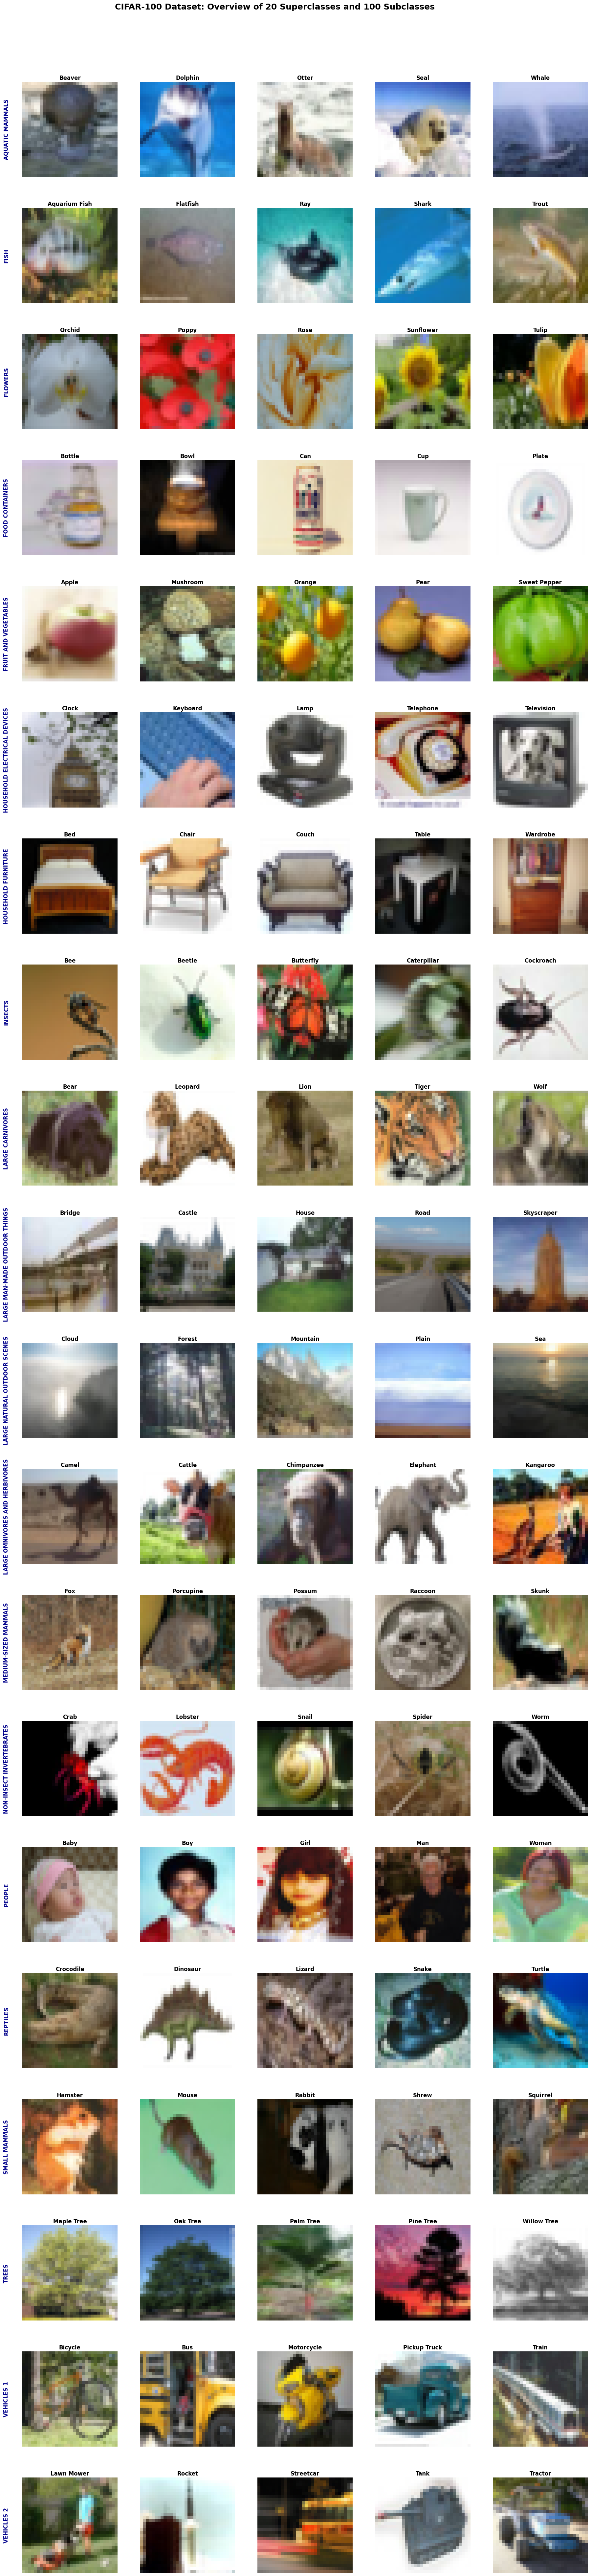


CIFAR-100 DATASET COMPREHENSIVE STATISTICS
Dataset Overview:
   - Total superclasses: 20
   - Total classes (subclasses): 100
   - Classes per superclass: 5
   - Total training samples: 50,000
   - Samples per class: 500
   - Image dimensions: 32x32x3 (RGB)

Superclass Breakdown:
--------------------------------------------------------------------------------
 1. Aquatic Mammals                    
       Subclasses: Beaver, Dolphin, Otter, Seal, Whale
 2. Fish                               
       Subclasses: Aquarium Fish, Flatfish, Ray, Shark, Trout
 3. Flowers                            
       Subclasses: Orchid, Poppy, Rose, Sunflower, Tulip
 4. Food Containers                    
       Subclasses: Bottle, Bowl, Can, Cup, Plate
 5. Fruit And Vegetables               
       Subclasses: Apple, Mushroom, Orange, Pear, Sweet Pepper
 6. Household Electrical Devices       
       Subclasses: Clock, Keyboard, Lamp, Telephone, Television
 7. Household Furniture                
       

In [2]:
def denormalize_image(img_tensor):
    """
    Denormalizes an image tensor from [-1, 1] to [0, 1] range for display.

    Args:
        img_tensor (torch.Tensor): Normalized image tensor with values in [-1, 1]

    Returns:
        numpy.ndarray: Denormalized image array with values clipped to [0, 1]
    """
    img = img_tensor.numpy().transpose(1, 2, 0)  # Convert from CHW to HWC format
    img = (img * 0.5) + 0.5  # Denormalize from [-1, 1] to [0, 1]
    return np.clip(img, 0, 1)

def visualize_cifar100(train_set, superclasses, classes):
    """
    Visualizes the CIFAR-100 dataset showing all superclasses and their subclasses.

    This function creates a comprehensive visualization of the CIFAR-100 dataset,
    displaying one sample image from each of the 100 classes organized by their
    20 superclasses. The visualization provides a clear overview of the dataset's diversity.

    Args:
        train_set (torchvision.datasets.CIFAR100): The CIFAR-100 training dataset
        superclasses (dict): Dictionary mapping superclass names to lists of subclass names
        classes (tuple): Tuple containing all 100 CIFAR-100 class names in order

    Returns:
        None: Displays the visualization and prints dataset summary statistics
    """
    print("Organizing CIFAR-100 images by class...")

    # Create a mapping from class name to class index
    class_name_to_idx = {name: idx for idx, name in enumerate(classes)}

    # Organize dataset by class - collect one sample image for each class
    class_images = {i: None for i in range(len(classes))}

    # Collect one sample image for each class
    for img, label in train_set:
        if class_images[label] is None:
            class_images[label] = img
        # Stop early if we have one sample for all classes
        if all(img is not None for img in class_images.values()):
            break

    # Create the main visualization
    num_superclasses = len(superclasses)
    cols_per_superclass = 5  # 5 subclasses per superclass

    fig, axes = plt.subplots(num_superclasses, cols_per_superclass,
                            figsize=(20, 4 * num_superclasses))

    # Handle case where there's only one superclass
    if num_superclasses == 1:
        axes = axes.reshape(1, -1)

    superclass_names = list(superclasses.keys())

    print("Creating visualization...")

    for super_idx, superclass_name in enumerate(superclass_names):
        subclass_names = superclasses[superclass_name]

        for sub_idx, subclass_name in enumerate(subclass_names):
            # Get class index
            class_idx = class_name_to_idx[subclass_name]

            ax = axes[super_idx, sub_idx]

            # Display image if available
            if class_images[class_idx] is not None:
                img = class_images[class_idx]
                img_np = denormalize_image(img)
                ax.imshow(img_np)

            ax.axis('off')

            # Add class name as title
            title = subclass_name.replace('_', ' ').title()
            ax.set_title(title, fontsize=12, pad=5, fontweight='bold')

        # Add superclass name on the left side
        axes[super_idx, 0].text(-0.2, 0.5, superclass_name.upper(),
                               transform=axes[super_idx, 0].transAxes,
                               fontsize=12, fontweight='bold',
                               verticalalignment='center',
                               rotation=90,
                               color='darkblue')

    plt.tight_layout()
    plt.suptitle('CIFAR-100 Dataset: Overview of 20 Superclasses and 100 Subclasses',
                 fontsize=18, fontweight='bold', y=0.98)
    plt.subplots_adjust(left=0.1, top=0.95)
    plt.show()

    # Print comprehensive statistics
    print_dataset_statistics(train_set, superclasses, classes)

def print_dataset_statistics(train_set, superclasses, classes):
    """
    Prints comprehensive dataset statistics.

    Args:
        train_set: CIFAR-100 training dataset
        superclasses: Dictionary of superclass mappings
        classes: Tuple of all class names
    """
    print("\n" + "="*80)
    print("CIFAR-100 DATASET COMPREHENSIVE STATISTICS")
    print("="*80)

    print(f"Dataset Overview:")
    print(f"   - Total superclasses: {len(superclasses)}")
    print(f"   - Total classes (subclasses): {len(classes)}")
    print(f"   - Classes per superclass: 5")
    print(f"   - Total training samples: {len(train_set):,}")
    print(f"   - Samples per class: {len(train_set) // len(classes)}")
    print(f"   - Image dimensions: 32x32x3 (RGB)")

    print(f"\nSuperclass Breakdown:")
    print("-" * 80)

    for idx, (superclass_name, subclass_names) in enumerate(superclasses.items(), 1):
        formatted_subclasses = [name.replace('_', ' ').title() for name in subclass_names]
        subclasses_str = ", ".join(formatted_subclasses)

        print(f"{idx:2d}. {superclass_name.title():35s}")
        print(f"       Subclasses: {subclasses_str}")


# Execute the main visualization function
print("Starting CIFAR-100 visualization...")
visualize_cifar100(train_set, superclasses, classes)

<a id="section-3"></a>
### **Section 3: TwoLayerNet Architecture (2 points)**

In this section, you will implement the architecture of a fully connected neural network called `TwoLayerNet`, consisting of two fully connected layers with a ReLU activation in between. The network accepts an input size of 3x32x32 (CIFAR-100 image), a specified hidden layer size, and the number of output classes. In the `__init__` method, define the first fully connected layer that maps the input size to the hidden size, and the second fully connected layer that maps the hidden size to the number of classes. 

Ensure to call the parent class constructor using `super(TwoLayerNet, self).__init__()`. In the `forward` method, flatten the input tensor, pass it through the first layer with ReLU activation, and then through the second layer to obtain the final scores.

**Note:** You are allowed to modify the provided function definitions as needed.

In [3]:
class TwoLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        '''
        Initializes the two-layer neural network model.

        Args:
            input_size (int): The size of the input features.
            hidden_size (int): The size of the hidden layer.
            num_classes (int): The number of classes in the dataset.
        '''

        super(TwoLayerNet, self).__init__()

        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes)
        )


    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        x = x.reshape(x.size(0), -1)
        return self.layers(x)

<a id="section-4"></a>
### **Section 4: ConvNet Architecture (2 points)**

In this section, you will implement a convolutional neural network inspired by the structure of [LeNet-5](https://ieeexplore.ieee.org/document/726791). The network processes color images using three convolutional layers followed by two fully connected layers. Since you need to feed color images into this network, determine the kernel size of the first convolutional layer. Additionally, calculate the number of trainable parameters in the "F6" layer, providing the calculation process.

In [4]:
class ConvNet(nn.Module):

    def __init__(self):
        '''	
        Initializes the convolutional neural network model.

        Args:
            None
        '''

        super(ConvNet, self).__init__()

        # Feature extractor (three convolutional layers + activations + pooling)
        self.features = nn.Sequential(
            # C1: First conv block: 3->6 channels with 5x5 kernels (handles RGB input), Tanh activation, then 2x2 average pooling
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),

            # C2: Second conv block: 6->16 channels with 5x5 kernels, Tanh activation, then 2x2 average pooling
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),

            # C3: Third conv block: 16->120 channels with 5x5 kernels, Tanh activation
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5),
            nn.Tanh()
        )

        self.classifier = nn.Sequential(
            nn.Linear(120, 84),  # F6 layer
            nn.Tanh(),  # Tanh activation
            nn.Linear(84, 100)  # Output layer for 100 CIFAR-100 classes
        )

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        x = self.features(x)  # Passes input through all convolutional layers
        x = x.reshape(x.size(0), -1)  # Flatten all dimensions except batch
        x = self.classifier(x)  # Passes flattened features through classifier to get final class scores
        return x

<a id="section-5"></a>
### **Section 5: Preparation of Training (7 points)**

In this section, you will create a custom dataset class to load the CIFAR-100 data, define a transform function for data augmentation, and set up an optimizer for training. While the previous section utilized the built-in CIFAR-100 class from `torchvision`, in practice, you often need to prepare datasets manually. Here, you will implement the `CIFAR100_loader` class to handle the dataset and use `DataLoader` to make it iterable. You will also define a transform function for data augmentation and an optimizer for updating the model's parameters.

In [5]:
# class CIFAR100_loader(Dataset):
#
#     def __init__(self, root, train=True, transform=None, download=False):
#         '''
#         Initializes the CIFAR-100 dataset loader.
#
#         Args:
#             root (str): The root directory to store the dataset.
#             train (bool): If True, loads the training data; otherwise, loads the test data.
#             transform (callable, optional): The data transformations to apply.
#             download (bool): If True, downloads the dataset if it is not already available.
#         '''
#
#         self.dataset = torchvision.datasets.CIFAR100(root=root, train=train, transform=None, download=download)
#         self.transform = transform
#
#     def __len__(self):
#         '''
#         Returns the number of samples in the dataset.
#
#         Returns:
#             int: The number of samples in the dataset.
#         '''
#
#         return len(self.dataset)
#
#     def __getitem__(self, idx):
#         '''
#         Retrieves a sample from the dataset at the specified index.
#
#         Args:
#             idx (int): The index of the sample to retrieve.
#
#         Returns:
#             tuple: A tuple containing the image and label tensors.
#         '''
#
#         image, label = self.dataset[idx]
#
#         if self.transform:
#             image = self.transform(image)
#
#         return image, label

# written code in CIFAR100.py to prevent jupyter notebook from not working when it's defined here
from CIFAR100 import CIFAR100_loader

In [6]:
def create_transforms(with_augmentations=False):
    '''
    Creates the data transformations for the CIFAR-100 dataset.

    Returns:
        torchvision.transforms.Compose: The data transformations for the dataset.
    '''
    if with_augmentations:
        return transforms.Compose([
            # Probabilistic data augmentations
            transforms.RandomHorizontalFlip(p=0.5),  # 50% chance of horizontal flip
            transforms.RandomCrop(32, padding=4),    # Random crop with padding
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Color variations
            # Convert to tensor and normalize
            transforms.ToTensor(),
            transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))  # CIFAR-100 stats
        ])

    return transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))])

In [7]:
def create_optimizer(model, learning_rate=0.001):
    '''
    Creates an optimizer for the model.

    Args:
        model (torch.nn.Module): The neural network model.
        learning_rate (float): The learning rate for the optimizer.

    Returns:
        torch.optim.Adam: The optimizer for the model.
    '''

    return torch.optim.Adam(model.parameters(), lr=learning_rate)

<a id="section-6"></a>
### **Section 6: Training the Networks (5 points)**

In this section, you will complete the `train` function and use it to train both the `TwoLayerNet` and `ConvNet` models. You will use the custom `CIFAR100_loader`, transform function, and optimizer function that you implemented. The goal is to compare the performance of the two models on the CIFAR-100 dataset.

In [8]:
from typing import Optional, Tuple

def validate(model: torch.nn.Module,
             loader: DataLoader,
             criterion: Optional[torch.nn.Module] = None) -> Tuple[Optional[float], float]:
    """
    Unified validation / test loop.

    Assumptions (as requested):
      * The provided loader is valid and non-empty.
      * The model and data will be moved automatically to the model's current device.
      * No explicit external device argument or loader None checks are performed.

    Args:
        model: Trained (or in-training) torch.nn.Module to evaluate.
        loader: DataLoader yielding (inputs, targets) batches.
        criterion: Optional loss function. If provided, the average loss will be
                   computed and returned; otherwise loss is returned as None.

    Returns:
        (avg_loss, accuracy_percent)
            avg_loss: Mean loss over all samples (or None if criterion is None)
            accuracy_percent: Classification accuracy in percent (0-100).
    """
    model.eval()

    # Infer the device from the model parameters
    device = next(model.parameters()).device

    total = 0
    correct = 0
    loss_sum = 0.0

    with torch.no_grad():
        for inputs, targets in loader:
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = model(inputs)

            if criterion is not None:
                # Accumulate sample-weighted loss for correct averaging.
                loss_sum += criterion(outputs, targets).item() * inputs.size(0)

            # Top-1 prediction.
            preds = outputs.argmax(dim=1)
            correct += (preds == targets).sum().item()
            total += targets.size(0)

    # Average loss only if criterion was provided.
    avg_loss = (loss_sum / total) if criterion is not None else None
    accuracy = 100.0 * correct / total

    return avg_loss, accuracy


In [9]:
def validate_per_class(net, testloader, classes):
    '''
    Validates the model on the test dataset per class.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.
        classes (tuple): The tuple of class names.

    Returns:
        None
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    class_correct = [0. for _ in range(len(classes))]
    class_total = [0. for _ in range(len(classes))]

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions = (predicted == labels).squeeze()

            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += correct_predictions[i].item()
                class_total[label] += 1

    for i, class_name in enumerate(classes):
        accuracy = 100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0
        print(f'Accuracy of {class_name:5s} : {accuracy:.2f} %')

In [10]:
# Helper utilities for improved training

def get_device():
    """Return preferred torch.device (CUDA > MPS > CPU)."""
    if torch.cuda.is_available():
        return torch.device('cuda')
    if getattr(torch.backends, 'mps', None) and torch.backends.mps.is_available():
        return torch.device('mps')
    return torch.device('cpu')

def compute_grad_norm(model):
    """Compute total L2 norm of gradients for diagnostics after backward."""
    total = 0.0
    for p in model.parameters():
        if p.grad is not None:
            g = p.grad.detach().data.norm(2)
            total += g.item() ** 2
    return total ** 0.5

### Additional training helper functions


In [11]:
from typing import Optional, Dict, Any, List

try:
    from torch.utils.tensorboard import SummaryWriter as _TBWriter
except ImportError:
    !pip install tensorboard
    from torch.utils.tensorboard import SummaryWriter as _TBWriter



# ------------------------------- Optimizer / Scheduler Builders -------------------------------

def build_optimizer(params, optimizer_type: str, lr: float, weight_decay: float):
    """Factory for Adam / AdamW optimizers."""
    opt_type = optimizer_type.lower()
    if opt_type == 'adamw':
        return torch.optim.AdamW(params, lr=lr, weight_decay=weight_decay)
    if opt_type == 'adam':
        return torch.optim.Adam(params, lr=lr, weight_decay=weight_decay)
    raise ValueError(f"Unsupported optimizer_type: {optimizer_type}")


def build_scheduler(optimizer, scheduler_type: str, epochs: int, lr: float):
    """Factory for cosine / plateau / none schedulers."""
    st = (scheduler_type or 'none').lower()
    if st == 'cosine':
        return torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs, eta_min=lr*1e-2)
    if st == 'none':
        return None
    raise ValueError(f"Unsupported scheduler_type: {scheduler_type}")


# ------------------------------- Single Training Step -------------------------------

def training_step(
    model: torch.nn.Module,
    batch,
    criterion: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    *,
    device: Optional[torch.device] = None,
    scheduler: Optional[object] = None,
    accumulate_steps: int = 1,
    step_index: int = 0,
    return_grad_norm: bool = False
) -> Dict[str, Any]:
    """
    Perform a single micro-batch update (supports gradient accumulation).

    Args:
        model: Network (assumed already moved to device).
        batch: Tuple (inputs, targets).
        criterion: Loss function returning scalar.
        optimizer: Optimizer instance.
        device: Torch device; inferred if None.
        scheduler: Optional LR scheduler (ONLY stepped here if it's OneCycleLR).
        accumulate_steps: Number of micro-batches to accumulate before optimizer.step().
        step_index: Zero-based micro-batch index relative to accumulation window.
        return_grad_norm: Whether to compute gradient norm before stepping.

    Returns:
        dict with:
          loss         (float) full (unscaled) loss for this micro-batch
          correct      (int)
          total        (int)
          accuracy     (float)
          grad_norm    (float or None)
          stepped      (bool)
          lr           (float)
    """
    if device is None:
        device = get_device()

    model.train()
    xb, yb = batch
    xb, yb = xb.to(device), yb.to(device)

    logits = model(xb)
    loss = criterion(logits, yb) / accumulate_steps
    optimizer.zero_grad(set_to_none=True)
    loss.backward()

    stepped = False
    gnorm = None
    if (step_index + 1) % accumulate_steps == 0:
        if return_grad_norm:
            gnorm = compute_grad_norm(model)
        optimizer.step()
        if scheduler and isinstance(scheduler, torch.optim.lr_scheduler.OneCycleLR):
            scheduler.step()
        stepped = True

    with torch.no_grad():
        preds = logits.argmax(1)
        correct = (preds == yb).sum().item()
        total = yb.size(0)
        acc = 100.0 * correct / total if total else 0.0

    return {
        "loss": loss.item() * accumulate_steps,
        "correct": correct,
        "total": total,
        "accuracy": acc,
        "grad_norm": gnorm,
        "stepped": stepped,
        "lr": optimizer.param_groups[0]['lr']
    }

# ------------------------------- Main Training Loop -------------------------------


def run_training_tb(
    model: torch.nn.Module,
    train_loader: torch.utils.data.DataLoader,
    val_loader: Optional[torch.utils.data.DataLoader] = None,
    *,
    epochs: int = 30,
    lr: float = 1e-3,
    weight_decay: float = 5e-4,
    optimizer_type: str = 'adam',
    scheduler_type: str = 'cosine',
    early_stop: Optional[Dict[str, Any]] = None,  # {'metric','mode','patience'}
    writer: Optional["_TBWriter"] = None,
    classes: Optional[List[str]] = None,
    superclasses: Optional[Dict[str, List[str]]] = None,
    log_hist_every: int = 10,
    log_per_class_every: int = 10,
    checkpoint_dir: Optional[str] = 'models',
    checkpoint_name: str = 'best_model',
    criterion: Optional[torch.nn.Module] = None,
    verbose: bool = True
) -> Dict[str, List[float]]:
    device = get_device()
    model.to(device)
    if criterion is None:
        criterion = torch.nn.CrossEntropyLoss()

    optimizer = build_optimizer(model.parameters(), optimizer_type, lr, weight_decay)
    scheduler = build_scheduler(optimizer, scheduler_type, epochs, lr)

    best_path = None
    if checkpoint_dir:
        os.makedirs(checkpoint_dir, exist_ok=True)
        best_path = os.path.join(checkpoint_dir, f"{checkpoint_name}.pth")

    history = {k: [] for k in ('train_loss','train_acc','val_loss','val_acc','lr','grad_norm')}
    if early_stop:
        monitor = early_stop.get('metric','val_acc')
        mode = early_stop.get('mode','max' if monitor == 'val_acc' else 'min')
        patience = int(early_stop.get('patience',10))
    else:
        monitor, mode, patience = 'val_acc','max', None
    best_metric = None
    stagnant = 0

    def improved(cur, best):
        if best is None: return True
        return cur > best if mode == 'max' else cur < best

    if writer:
        cfg = {
            'model': model.__class__.__name__,
            'epochs': epochs,
            'optimizer_type': optimizer_type,
            'scheduler_type': scheduler_type,
            'lr': lr,
            'weight_decay': weight_decay,
            'train_size': len(train_loader.dataset),
            'batch_size': train_loader.batch_size,
            'val_size': len(val_loader.dataset) if val_loader else 0,
            'early_metric': monitor,
            'early_mode': mode,
            'early_patience': patience if patience is not None else -1
        }
        md = ["|Key|Value|","|---|---|"] + [f"|{k}|{v}|" for k,v in cfg.items()]
        writer.add_text("Config/Hyperparams", "\n".join(md), 0)

    for epoch in range(1, epochs+1):
        model.train()
        epoch_loss = 0.0
        epoch_correct = 0
        epoch_total = 0
        last_grad_norm = float('nan')

        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad(set_to_none=True)
            logits = model(xb)
            loss = criterion(logits, yb)
            loss.backward()
            # grad norm
            gn = 0.0
            for p in model.parameters():
                if p.grad is not None:
                    gn += p.grad.data.norm(2).item() ** 2
            last_grad_norm = math.sqrt(gn)
            optimizer.step()

            with torch.no_grad():
                preds = logits.argmax(1)
                correct = (preds == yb).sum().item()
            epoch_loss += loss.item() * yb.size(0)
            epoch_correct += correct
            epoch_total += yb.size(0)

        train_loss = epoch_loss / epoch_total if epoch_total else 0.0
        train_acc = 100.0 * epoch_correct / epoch_total if epoch_total else 0.0

        val_loss, val_acc = validate(model, val_loader, criterion) if val_loader else (None, None)

        if scheduler and not isinstance(scheduler, torch.optim.lr_scheduler.OneCycleLR):
            if isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
                metric_val = val_acc if (monitor == 'val_acc' and val_acc is not None) else (
                    val_loss if (monitor == 'val_loss' and val_loss is not None) else train_loss
                )
                scheduler.step(metric_val)
            else:
                scheduler.step()

        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss if val_loss is not None else float('nan'))
        history['val_acc'].append(val_acc if val_acc is not None else float('nan'))
        history['lr'].append(optimizer.param_groups[0]['lr'])
        history['grad_norm'].append(last_grad_norm)

        if writer:
            writer.add_scalar('Train/Loss', train_loss, epoch)
            writer.add_scalar('Train/Accuracy', train_acc, epoch)
            writer.add_scalar('LR', optimizer.param_groups[0]['lr'], epoch)
            writer.add_scalar('Grad/Norm', last_grad_norm, epoch)
            if val_acc is not None: writer.add_scalar('Val/Accuracy', val_acc, epoch)
            if val_loss is not None: writer.add_scalar('Val/Loss', val_loss, epoch)
            if log_hist_every > 0 and epoch % log_hist_every == 0:
                for n, p in model.named_parameters():
                    writer.add_histogram(f"Weights/{n}", p, epoch)
                    if p.grad is not None:
                        writer.add_histogram(f"Grads/{n}", p.grad, epoch)
            if (classes and val_loader and log_per_class_every > 0 and
                (epoch % log_per_class_every == 0 or epoch == epochs)):
                validate_per_class(
                    model,
                    val_loader,
                    tuple(classes),
                    writer=writer,
                    epoch=epoch,
                    superclasses=superclasses,
                    verbose=False
                )

        # Checkpoint saving (always active if val_acc available)
        if val_acc is not None:
            monitored_value = val_acc if monitor == 'val_acc' else (val_loss if val_loss is not None else train_loss)
            if improved(monitored_value, best_metric):
                best_metric = monitored_value
                stagnant = 0
                if best_path:
                    torch.save({
                        'epoch': epoch,
                        'model_state': model.state_dict(),
                        'val_acc': val_acc,
                        'val_loss': val_loss,
                        'train_acc': train_acc,
                        'train_loss': train_loss
                    }, best_path)
                    if verbose:
                        print(f"  → Saved checkpoint: {best_path} (Val Acc: {val_acc:.2f}%)")
            else:
                stagnant += 1
            
            # Early stopping (only if enabled)
            if early_stop and patience is not None and stagnant >= patience:
                if verbose:
                    print(f"[EarlyStop] epoch {epoch} (best {monitor}={best_metric:.3f})")
                break

        if verbose:
            va_str = f"{val_acc:.2f}%" if val_acc is not None else "NA"
            vl_str = f"{val_loss:.4f}" if val_loss is not None else "NA"
            print(f"Epoch {epoch:03d}/{epochs} | TL {train_loss:.4f} | TA {train_acc:.2f}% "
                  f"| VL {vl_str} | VA {va_str} | LR {optimizer.param_groups[0]['lr']:.3e}")

    if best_path and os.path.exists(best_path):
        ckpt = torch.load(best_path, map_location=device)
        model.load_state_dict(ckpt['model_state'])
        model.best_checkpoint = ckpt
        if verbose:
            print(f"Loaded best checkpoint from epoch {ckpt['epoch']} (ValAcc {ckpt['val_acc']:.2f}%).")

    model.history_tb = history
    return history



In [12]:
def train(net, train_loader, criterion, optimizer, epochs=100, val_loader=None,
          scheduler=None, early_stop=None, print_every=1, model_checkpoint_path=None):
    '''
    Train loop with optional validation, scheduler stepping, gradient norm tracking,
    and early stopping. Keeps original required parameters while adding optional ones.

    Args:
        net (nn.Module): Model to train.
        train_loader (DataLoader): Training data loader.
        criterion (nn.Module): Loss function.
        optimizer (Optimizer): Optimizer instance.
        epochs (int): Number of epochs.
        val_loader (DataLoader, optional): Validation loader for per-epoch eval.
        scheduler (lr scheduler, optional): Learning rate scheduler (epoch-based). OneCycleLR should be stepped externally per-batch.
        early_stop (dict, optional): {'patience': int, 'metric': 'val_acc'|'val_loss'}.
        print_every (int): Print progress every N epochs.

    Returns:
        dict: History with keys: train_loss, train_acc, val_loss, val_acc, grad_norm, lr.
    '''
    device = get_device()
    net.to(device)

    history = {k: [] for k in ['train_loss','train_acc','val_loss','val_acc','grad_norm','lr']}
    patience_ctr = 0
    best_metric = None

    def improved(cur, best, metric):
        if best is None:
            return True
        if metric == 'val_acc':
            return cur > best
        if metric == 'val_loss':
            return cur < best
        return False

    for epoch in range(epochs):
        net.train()
        epoch_loss_accum = 0.0
        epoch_correct = 0
        epoch_total = 0
        grad_norm_accum = 0.0

        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            out = net(x)
            loss = criterion(out, y)

            optimizer.zero_grad()
            loss.backward()
            gn = compute_grad_norm(net)
            grad_norm_accum += gn
            optimizer.step()

            bs = x.size(0)
            epoch_loss_accum += loss.item() * bs
            preds = out.argmax(1)
            epoch_correct += (preds == y).sum().item()
            epoch_total += bs

        train_loss = epoch_loss_accum / epoch_total if epoch_total else 0.0
        train_acc = 100.0 * epoch_correct / epoch_total if epoch_total else 0.0
        grad_norm_mean = grad_norm_accum / max(1, len(train_loader))

        val_loss = None
        val_acc = None
        if val_loader is not None:
            net.eval()
            v_loss_accum = 0.0
            v_correct = 0
            v_total = 0
            with torch.no_grad():
                for vx, vy in val_loader:
                    vx, vy = vx.to(device), vy.to(device)
                    v_out = net(vx)
                    v_l = criterion(v_out, vy)
                    v_loss_accum += v_l.item() * vx.size(0)
                    v_preds = v_out.argmax(1)
                    v_correct += (v_preds == vy).sum().item()
                    v_total += vy.size(0)
            val_loss = v_loss_accum / v_total if v_total else None
            val_acc = 100.0 * v_correct / v_total if v_total else None

        # Scheduler step (epoch-based)
        if scheduler is not None and not isinstance(scheduler, torch.optim.lr_scheduler.OneCycleLR):
            if isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
                monitor = val_loss if (val_loss is not None) else train_loss
                scheduler.step(monitor)
            else:
                scheduler.step()

        current_lr = optimizer.param_groups[0]['lr']

        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['grad_norm'].append(grad_norm_mean)
        history['lr'].append(current_lr)

        if (epoch + 1) % print_every == 0 or epoch in (0, epochs - 1):
            val_msg = f" | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%" if val_acc is not None else ""
            print(f"Epoch {epoch+1:03d}/{epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%{val_msg} | GradNorm: {grad_norm_mean:.2f} | LR: {current_lr:.6f}")

        # Early stopping (only if validation provided)
        if early_stop and val_loader is not None:
            metric_name = early_stop.get('metric', 'val_acc')
            metric_val = val_acc if metric_name == 'val_acc' else val_loss
            if metric_val is not None:
                if improved(metric_val, best_metric, metric_name):
                    best_metric = metric_val
                    if model_checkpoint_path:
                        if not os.path.exists(os.path.dirname(model_checkpoint_path)):
                            os.makedirs(os.path.dirname(model_checkpoint_path))
                        print(f"Saving best model checkpoint to {model_checkpoint_path}")
                        torch.save({
                            'epoch': epoch,
                            'model_state_dict': net.state_dict(),
                            'optimizer_state_dict': optimizer.state_dict(),
                            'val_acc': val_acc,
                            'val_loss': val_loss,
                            'train_acc': train_acc,
                            'train_loss': train_loss,
                            }, model_checkpoint_path)
                    patience_ctr = 0
                else:
                    patience_ctr += 1
                    if patience_ctr >= early_stop.get('patience', 0):
                        print(f"Early stopping at epoch {epoch+1} (no improvement in {metric_name}).")
                        break

    print('Training complete.')
    net.history = history
    return history

First, initialize the datasets and data loaders for both models.

In [13]:
# Reproducibility seed for Section 6 baseline runs
SECTION6_SEED = 42
torch.manual_seed(SECTION6_SEED)
print(f"[Section 6] Seed fixed at {SECTION6_SEED}")

DATA_ROOT = './data'
NUM_WORKERS = 4
BATCH_TRAIN = 128
BATCH_TEST = 1000

train_transform = create_transforms(with_augmentations=False)
test_transform = create_transforms(with_augmentations=False)

full_train_dataset = CIFAR100_loader(root=DATA_ROOT, train=True, transform=train_transform)
test_dataset = CIFAR100_loader(root=DATA_ROOT, train=False, transform=test_transform)


# doing train-val split
all_labels = np.array([full_train_dataset.dataset[i][1] for i in range(len(full_train_dataset))])


# Create stratified indices
indices = np.arange(len(full_train_dataset))
train_indices, val_indices = train_test_split(
    indices,
    test_size=0.2,  # 20% for validation
    stratify=all_labels,  # Stratify by class - ensures balanced split
    random_state=SECTION6_SEED  # Reproducible
)

# Create subset datasets
train_dataset = Subset(full_train_dataset, train_indices)
val_dataset = Subset(full_train_dataset, val_indices)


train_loader = DataLoader(train_dataset, batch_size=BATCH_TRAIN, shuffle=True,
                          num_workers=NUM_WORKERS, drop_last=True, pin_memory=True,
                          persistent_workers=True,
                          multiprocessing_context="spawn")
test_loader = DataLoader(test_dataset, batch_size=BATCH_TEST, shuffle=False,
                         num_workers=NUM_WORKERS, pin_memory=True,
                         persistent_workers=True,
                        multiprocessing_context="spawn")

val_loader = DataLoader(val_dataset, batch_size=BATCH_TEST, shuffle=False,
                        num_workers=NUM_WORKERS, pin_memory=True,
                        persistent_workers=True,
                        multiprocessing_context="spawn")

print(f"Dataset ready: train={len(train_dataset)} test={len(test_dataset)}")
print(f"Batch sizes -> train {BATCH_TRAIN}, test {BATCH_TEST}")

os.makedirs('models', exist_ok=True)

def save_weights(model: nn.Module, label: str):
    ts = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
    path = f'models/{label}_{ts}.pth'
    torch.save(model.state_dict(), path)
    return path

[Section 6] Seed fixed at 42
Dataset ready: train=40000 test=10000
Batch sizes -> train 128, test 1000


Next, train the TwoLayerNet model on the CIFAR-100 dataset using the training data loader.

In [25]:
TL_EPOCHS = 20
TL_LR = 1e-3
TL_WD = 5e-4
TL_HIDDEN = 512

print("\n" + "="*62)
print("Baseline Training: TwoLayerNet")
print("="*62)
print(f"Hidden={TL_HIDDEN} LR={TL_LR} WD={TL_WD} Epochs={TL_EPOCHS}")

# Set up TensorBoard writer
timestamp = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
tb_writer_fc = SummaryWriter(f'runs/cifar100/TwoLayerNet/{timestamp}')

input_dim = 3 * 32 * 32
fc_net = TwoLayerNet(input_size=input_dim, hidden_size=TL_HIDDEN, num_classes=100)
loss_fc = nn.CrossEntropyLoss()

start_fc = time.time()
fc_hist = run_training_tb(
    fc_net, 
    train_loader=train_loader, 
    val_loader=test_loader,
    epochs=TL_EPOCHS,
    lr=TL_LR,
    weight_decay=TL_WD,
    optimizer_type='adam',
    scheduler_type='none',
    criterion=loss_fc,
    writer=tb_writer_fc,
    checkpoint_dir='checkpoints',
    checkpoint_name='TwoLayerNet_baseline_best',
    verbose=True
)
fc_time = time.time() - start_fc
tb_writer_fc.close()

fc_tr_loss = fc_hist['train_loss'][-1]
fc_tr_acc = fc_hist['train_acc'][-1]
fc_te_loss = max([x for x in fc_hist['val_loss'] if not math.isnan(x)])
fc_te_acc = max([x for x in fc_hist['val_acc'] if not math.isnan(x)])

fc_path = save_weights(fc_net, 'twolayernet_cifar100')
print("\nTwoLayerNet results:")
print(f"  Train Loss {fc_tr_loss:.4f} | Train Acc {fc_tr_acc:.2f}%")
print(f"  Best Test  Loss {fc_te_loss:.4f} | Best Test  Acc {fc_te_acc:.2f}%")
print(f"  Time {fc_time/60:.2f} min | Saved {fc_path}")
print(f"  TensorBoard logs: runs/cifar100/TwoLayerNet/{timestamp}")


Baseline Training: TwoLayerNet
Hidden=512 LR=0.001 WD=0.0005 Epochs=20
  → Saved checkpoint: checkpoints/TwoLayerNet_baseline_best.pth (Val Acc: 16.83%)
Epoch 001/20 | TL 3.9328 | TA 13.08% | VL 3.6925 | VA 16.83% | LR 1.000e-03
  → Saved checkpoint: checkpoints/TwoLayerNet_baseline_best.pth (Val Acc: 19.58%)
Epoch 002/20 | TL 3.4403 | TA 20.38% | VL 3.6228 | VA 19.58% | LR 1.000e-03
  → Saved checkpoint: checkpoints/TwoLayerNet_baseline_best.pth (Val Acc: 19.91%)
Epoch 003/20 | TL 3.2181 | TA 24.32% | VL 3.6448 | VA 19.91% | LR 1.000e-03
  → Saved checkpoint: checkpoints/TwoLayerNet_baseline_best.pth (Val Acc: 20.96%)
Epoch 004/20 | TL 3.0666 | TA 27.22% | VL 3.6197 | VA 20.96% | LR 1.000e-03
  → Saved checkpoint: checkpoints/TwoLayerNet_baseline_best.pth (Val Acc: 21.94%)
Epoch 005/20 | TL 2.9415 | TA 29.63% | VL 3.5573 | VA 21.94% | LR 1.000e-03
Epoch 006/20 | TL 2.8147 | TA 31.88% | VL 3.6262 | VA 21.71% | LR 1.000e-03
Epoch 007/20 | TL 2.7058 | TA 34.59% | VL 3.7465 | VA 21.45% |

Finally, train the ConvNet model on the CIFAR-100 dataset using the training data loader.

In [26]:
CV_EPOCHS = 20
CV_LR = 1e-3
CV_WD = 5e-4

print("\n" + "="*62)
print("Baseline Training: ConvNet")
print("="*62)
print(f"LR={CV_LR} WD={CV_WD} Epochs={CV_EPOCHS}")


timestamp = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
tb_writer_cv = SummaryWriter(f'runs/cifar100/ConvNet/{timestamp}')

conv_net = ConvNet()
loss_conv = nn.CrossEntropyLoss()

start_cv = time.time()
cv_hist = run_training_tb(
    conv_net,
    train_loader=train_loader,
    val_loader=test_loader,
    epochs=CV_EPOCHS,
    lr=CV_LR,
    weight_decay=CV_WD,
    optimizer_type='adam',
    scheduler_type='none',
    criterion=loss_conv,
    writer=tb_writer_cv,
    checkpoint_dir='checkpoints',
    checkpoint_name='ConvNet_baseline_best',
    verbose=True
)
cv_time = time.time() - start_cv
tb_writer_cv.close()

cv_tr_loss = cv_hist['train_loss'][-1]
cv_tr_acc = cv_hist['train_acc'][-1]
cv_te_loss = max([x for x in cv_hist['val_loss'] if not math.isnan(x)])
cv_te_acc = max([x for x in cv_hist['val_acc'] if not math.isnan(x)])

cv_path = save_weights(conv_net, 'convnet_cifar100')
print("\nConvNet results:")
print(f"  Train Loss {cv_tr_loss:.4f} | Train Acc {cv_tr_acc:.2f}%")
print(f"  Best Test  Loss {cv_te_loss:.4f} | Best Test  Acc {cv_te_acc:.2f}%")
print(f"  Time {cv_time/60:.2f} min | Saved {cv_path}")
print(f"  TensorBoard logs: runs/cifar100/ConvNet/{timestamp}")

print("\n" + "="*62)
print("Baseline Comparison (Section 6)")
print("="*62)
print(f"TwoLayerNet Best Test Acc: {fc_te_acc:.2f}%")
print(f"ConvNet    Best Test Acc: {cv_te_acc:.2f}%")
print(f"Accuracy Gain (ConvNet - TwoLayerNet): {cv_te_acc - fc_te_acc:+.2f}%")
print("="*62)


Baseline Training: ConvNet
LR=0.001 WD=0.0005 Epochs=20
  → Saved checkpoint: checkpoints/ConvNet_baseline_best.pth (Val Acc: 11.72%)
Epoch 001/20 | TL 4.0779 | TA 8.54% | VL 3.8260 | VA 11.72% | LR 1.000e-03
  → Saved checkpoint: checkpoints/ConvNet_baseline_best.pth (Val Acc: 15.94%)
Epoch 002/20 | TL 3.7027 | TA 14.22% | VL 3.6322 | VA 15.94% | LR 1.000e-03
  → Saved checkpoint: checkpoints/ConvNet_baseline_best.pth (Val Acc: 17.30%)
Epoch 003/20 | TL 3.5422 | TA 17.28% | VL 3.5176 | VA 17.30% | LR 1.000e-03
  → Saved checkpoint: checkpoints/ConvNet_baseline_best.pth (Val Acc: 19.05%)
Epoch 004/20 | TL 3.4215 | TA 19.17% | VL 3.4303 | VA 19.05% | LR 1.000e-03
  → Saved checkpoint: checkpoints/ConvNet_baseline_best.pth (Val Acc: 19.87%)
Epoch 005/20 | TL 3.3287 | TA 20.75% | VL 3.3694 | VA 19.87% | LR 1.000e-03
  → Saved checkpoint: checkpoints/ConvNet_baseline_best.pth (Val Acc: 20.08%)
Epoch 006/20 | TL 3.2483 | TA 22.07% | VL 3.3302 | VA 20.08% | LR 1.000e-03
  → Saved checkpoint

<a id="section-7"></a>
### **Section 7: Setting Up the Hyperparameters (14 points)**

In this section, I experiment with both the `ConvNet` and `TwoLayerNet` models by tuning the hyperparameters to achieve the highest possible accuracy. I modify the training process, including the `train` function, `DataLoader`, `transform` functions, and optimizer as needed.

The section is organized as follows:
1. **Extended Model Architectures**: Define extended versions of TwoLayerNet and ConvNet with additional layers
2. **Hyperparameter Optimization**: Use Optuna to systematically search for optimal hyperparameters
3. **Final Training**: Train all models with optimized hyperparameters on the full training set
4. **Evaluation**: Compare all models and analyze the results

For the extended architectures:
- ExtendedTwoLayerNet: Added two more hidden layers with dropout regularization
- ExtendedConvNet: Added two more convolutional layers with batch normalization and dropout

I tune hyperparameters including learning rate, batch size, number of epochs, optimizer type, scheduler type, weight decay, dropout rates, and hidden layer sizes.

#### 7.1 Extended Model Architectures

The following cells define extended versions of both TwoLayerNet and ConvNet with additional layers as required. These architectures include regularization techniques like dropout and batch normalization to improve generalization.

In [14]:
# Extended architectures (adding layers per requirement)
class ExtendedTwoLayerNet(nn.Module):
    """Deep MLP: input -> h1 -> h2 -> h3 -> out with dropout."""
    def __init__(self, input_size=3*32*32, h1=768, h2=512, h3=256, num_classes=100, dropout=0.25):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Linear(input_size, h1), nn.SiLU(), nn.Dropout(dropout),
            nn.Linear(h1, h2), nn.SiLU(), nn.Dropout(dropout),
            nn.Linear(h2, h3), nn.SiLU(), nn.Dropout(dropout),
            nn.Linear(h3, num_classes)
        )
    def forward(self, x):
        return self.seq(x.reshape(x.size(0), -1))

class ExtendedConvNet(nn.Module):
    """Adds a 1x1 conv (expansion) and deeper classifier head."""
    def __init__(self, in_channels=3, fc_mid=256, dropout=0.30, c1_out=32, c2_out=64, c3_out=128, c4_out=256, c5_out=512, dropout2d=0.2, num_classes=100):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels, c1_out ,5), nn.BatchNorm2d(c1_out), nn.SiLU(), nn.AvgPool2d(2,2),
            nn.Conv2d(c1_out, c2_out, 5), nn.BatchNorm2d(c2_out), nn.SiLU(), nn.Dropout2d(dropout2d),
            nn.Conv2d(c2_out,c3_out,3, padding=1), nn.BatchNorm2d(c3_out), nn.SiLU(), nn.Dropout2d(dropout2d),
            nn.Conv2d(c3_out,c4_out,3, padding=1), nn.BatchNorm2d(c4_out), nn.SiLU(), nn.Dropout2d(dropout2d), nn.AvgPool2d(2,2),
            nn.Conv2d(c4_out, c5_out, 5), nn.BatchNorm2d(c5_out), nn.SiLU(),
        )
        self.classifier = nn.Sequential(
            nn.Linear(c5_out, fc_mid), nn.SiLU(), nn.Dropout(dropout),
            nn.Linear(fc_mid, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.reshape(x.size(0), -1)  # (batch, c5_out, 1, 1) -> (batch, c5_out)
        x = self.classifier(x)
        return x

#### 7.2 Hyperparameter Optimization Setup

The following cells set up the infrastructure for hyperparameter optimization using Optuna. This includes:
- DataLoader factories for different batch sizes
- Training functions that support pruning (early stopping of unpromising trials)
- Objective functions for each model architecture
- Study runners and visualization utilities

New wrapper functions for optuna

In [15]:
# =========================
# Optuna Integration Block
# =========================

# -------- DataLoader factory (reuses existing datasets) --------
def create_trial_dataloaders(
    batch_size: int,
    *,
    train_dataset,
    val_dataset: Optional[torch.utils.data.Dataset] = None,
    test_dataset: Optional[torch.utils.data.Dataset] = None,
    full_train_dataset: Optional[torch.utils.data.Dataset] = None,
    final_eval: bool = False,
    num_workers: int = 4,
    test_batch_size: int = 512
):
    """
    Returns (train_loader, val_loader).
    final_eval=True -> train on full_train_dataset (or train_dataset if None) and validate on test_dataset.
    If val_dataset is None (during search), a split should have been created beforehand.
    """
    if final_eval:
        train_src = full_train_dataset or train_dataset
        val_src = test_dataset
    else:
        train_src = train_dataset
        val_src = val_dataset or test_dataset
    train_loader = DataLoader(train_src, batch_size=batch_size, shuffle=True,
                              num_workers=num_workers, drop_last=True, pin_memory=True,
                              persistent_workers=True, multiprocessing_context='spawn')
    val_loader = DataLoader(val_src, batch_size=test_batch_size, shuffle=False,
                            num_workers=num_workers, pin_memory=True,
                            persistent_workers=True, multiprocessing_context='spawn')
    return train_loader, val_loader

# -------- Core pruning-aware trial trainer (epoch loop) --------
def train_trial_with_pruning(
    model: torch.nn.Module,
    train_loader: torch.utils.data.DataLoader,
    val_loader: torch.utils.data.DataLoader,
    *,
    trial: optuna.trial.Trial,
    epochs: int,
    optimizer_type: str,
    scheduler_type: str,
    lr: float,
    weight_decay: float,
    criterion: Optional[torch.nn.Module] = None,
    report_every: int = 10
) -> float:
    """
    Uses existing build_optimizer / build_scheduler / training_step / validate.
    Prunes via MedianPruner (or configured pruner) based on validation accuracy.
    """
    device = get_device()
    model.to(device)
    if criterion is None:
        criterion = torch.nn.CrossEntropyLoss()

    optimizer = build_optimizer(model.parameters(), optimizer_type, lr, weight_decay)
    scheduler = build_scheduler(optimizer, scheduler_type, epochs, lr)

    best_acc = -1.0
    best_state = None

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0
        epoch_correct = 0
        epoch_total = 0

        for step_idx, batch in enumerate(train_loader):
            out = training_step(
                model,
                batch,
                criterion,
                optimizer,
                device=device,
                scheduler=None,
                accumulate_steps=1,
                step_index=step_idx,
                return_grad_norm=False
            )
            epoch_loss += out['loss']
            epoch_correct += out['correct']
            epoch_total += out['total']

        train_loss = epoch_loss / epoch_total if epoch_total else 0.0
        train_acc = 100.0 * epoch_correct / epoch_total if epoch_total else 0.0

        # Validation
        val_loss, val_acc = validate(model, val_loader, criterion=criterion)

        # Scheduler step
        if scheduler:
            if isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
                metric = val_acc if val_acc is not None else train_acc
                scheduler.step(metric)
            else:
                scheduler.step()

        # Track best
        if val_acc > best_acc:
            best_acc = val_acc
            best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

        # Pruning
        trial.report(val_acc, epoch)
        if trial.should_prune():
            raise optuna.TrialPruned()

        if report_every and (epoch + 1) % report_every == 0:
            print(f"[Trial {trial.number}] Epoch {epoch+1}/{epochs} "
                  f"| TL {train_loss:.4f} | TA {train_acc:.2f}% | VA {val_acc:.2f}% | Best {best_acc:.2f}%")

    if best_state:
        model.load_state_dict(best_state)
    return best_acc

# -------- Shared objective helper --------
def _common_space(trial, *, lr_key='lr'):
    lr = trial.suggest_float(lr_key, 1e-4, 1e-2, log=True)
    weight_decay = trial.suggest_float('weight_decay', 1e-5, 1e-3, log=True)
    optimizer_type = trial.suggest_categorical('optimizer_type', ['adam', 'adamw'])
    scheduler_type = trial.suggest_categorical('scheduler_type', ['cosine', 'none'])
    batch_size = trial.suggest_categorical('batch_size', [128, 256, 512])
    return lr, weight_decay, optimizer_type, scheduler_type, batch_size

# -------- Objective: TwoLayerNet --------
def objective_twolayernet(trial):
    lr, weight_decay, optimizer_type, scheduler_type, batch_size = _common_space(trial)
    hidden_size = trial.suggest_categorical('hidden_size', [512, 1024, 2048])

    train_loader, val_loader = create_trial_dataloaders(
        batch_size,
        train_dataset=train_dataset,
        val_dataset=val_dataset,
        test_dataset=test_dataset
    )

    model = TwoLayerNet(input_size=3*32*32, hidden_size=hidden_size, num_classes=100)
    best_acc = train_trial_with_pruning(
        model,
        train_loader,
        val_loader,
        trial=trial,
        epochs=30,
        optimizer_type=optimizer_type,
        scheduler_type=scheduler_type,
        lr=lr,
        weight_decay=weight_decay,
        criterion=torch.nn.CrossEntropyLoss()
    )
    return best_acc

# -------- Objective: ConvNet --------
def objective_convnet(trial):
    lr, weight_decay, optimizer_type, scheduler_type, batch_size = _common_space(trial)
    train_loader, val_loader = create_trial_dataloaders(
        batch_size,
        train_dataset=train_dataset,
        val_dataset=val_dataset,
        test_dataset=test_dataset
    )
    model = ConvNet()
    best_acc = train_trial_with_pruning(
        model,
        train_loader,
        val_loader,
        trial=trial,
        epochs=30,
        optimizer_type=optimizer_type,
        scheduler_type=scheduler_type,
        lr=lr,
        weight_decay=weight_decay,
        criterion=torch.nn.CrossEntropyLoss()
    )
    return best_acc

# -------- Objective: ExtendedTwoLayerNet --------
def objective_extended_twolayernet(trial):
    lr, weight_decay, optimizer_type, scheduler_type, batch_size = _common_space(trial)
    h1 = trial.suggest_categorical('h1', [1024, 1536])
    h2 = trial.suggest_categorical('h2', [512, 768])
    h3 = trial.suggest_categorical('h3', [256, 384])
    dropout = trial.suggest_float('dropout', 0.1, 0.4)

    train_loader, val_loader = create_trial_dataloaders(
        batch_size,
        train_dataset=train_dataset,
        val_dataset=val_dataset,
        test_dataset=test_dataset
    )
    model = ExtendedTwoLayerNet(h1=h1, h2=h2, h3=h3, dropout=dropout)
    best_acc = train_trial_with_pruning(
        model,
        train_loader,
        val_loader,
        trial=trial,
        epochs=50,
        optimizer_type=optimizer_type,
        scheduler_type=scheduler_type,
        lr=lr,
        weight_decay=weight_decay,
        criterion=torch.nn.CrossEntropyLoss()
    )
    return best_acc

# -------- Objective: ExtendedConvNet --------
def objective_extended_convnet(trial):
    lr, weight_decay, optimizer_type, scheduler_type, batch_size = _common_space(trial)
    fc_mid = trial.suggest_categorical('fc_mid', [128, 192, 256])
    dropout = trial.suggest_float('dropout', 0.1, 0.4)
    dropout2d = trial.suggest_float('dropout2d', 0.1, 0.4)

    train_loader, val_loader = create_trial_dataloaders(
        batch_size,
        train_dataset=train_dataset,
        val_dataset=val_dataset,
        test_dataset=test_dataset
    )
    model = ExtendedConvNet(fc_mid=fc_mid, dropout=dropout, dropout2d=dropout2d)
    best_acc = train_trial_with_pruning(
        model,
        train_loader,
        val_loader,
        trial=trial,
        epochs=50,
        optimizer_type=optimizer_type,
        scheduler_type=scheduler_type,
        lr=lr,
        weight_decay=weight_decay,
        criterion=torch.nn.CrossEntropyLoss()
    )
    return best_acc

# -------- Study runner --------
def run_optuna_study(objective_fn, study_name: str, n_trials: int = 40, seed: int = 42):
    sampler = optuna.samplers.TPESampler(seed=seed, multivariate=True)
    pruner = optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=5)
    study = optuna.create_study(direction='maximize',
                                study_name=study_name,
                                sampler=sampler,
                                pruner=pruner)
    study.optimize(objective_fn, n_trials=n_trials, show_progress_bar=True)
    print("\n" + "="*70)
    print(f"{study_name} RESULTS")
    print("="*70)
    print(f"Best Trial #{study.best_trial.number} | Best Val Acc: {study.best_value:.2f}%")
    for k, v in study.best_params.items():
        print(f"  {k}: {v}")
    print("="*70)
    return study

# -------- Visualization / persistence --------
def visualize_and_save_study(study: optuna.Study, model_name: str):
    ts = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
    out_dir = './optuna_studies'
    os.makedirs(out_dir, exist_ok=True)
    pkl_path = f"{out_dir}/{model_name.lower()}_{ts}.pkl"
    joblib.dump(study, pkl_path)

    vals = [t.value for t in study.trials if t.value is not None]
    plt.figure(figsize=(7,4))
    plt.plot(vals, 'o-', alpha=0.7)
    plt.axhline(study.best_value, color='r', ls='--', label=f"Best {study.best_value:.2f}%")
    plt.xlabel("Trial")
    plt.ylabel("Validation Accuracy (%)")
    plt.title(f"{model_name} Hyperparameter Search")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

    try:
        fig = optuna.visualization.matplotlib.plot_param_importances(study)
        fig.tight_layout()
        plt.show()
    except Exception:
        print("Param importance plot unavailable (maybe insufficient completed trials).")

    df = study.trials_dataframe()
    csv_path = f"{out_dir}/{model_name.lower()}_trials_{ts}.csv"
    df.to_csv(csv_path, index=False)
    print(f"Saved study artifacts:\n  PKL: {pkl_path}\n  CSV: {csv_path}")

#### 7.3 Hyperparameter Search

The following cells run Optuna studies to find optimal hyperparameters for each model. Each study runs 40-160 trials with different hyperparameter combinations, using median pruning to stop unpromising trials early.

/Users/itay/miniconda3/envs/cv1/lib/python3.12/site-packages/optuna/samplers/_tpe/sampler.py:319: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-10-15 21:21:17,390] A new study created in memory with name: TwoLayerNet_CIFAR100


  0%|          | 0/40 [00:00<?, ?it/s]

[Trial 0] Epoch 10/30 | TL 0.0072 | TA 53.44% | VA 24.69% | Best 24.69%
[Trial 0] Epoch 20/30 | TL 0.0028 | TA 87.52% | VA 26.77% | Best 27.28%
[Trial 0] Epoch 30/30 | TL 0.0017 | TA 95.77% | VA 28.16% | Best 28.23%
[I 2025-10-15 21:22:35,195] Trial 0 finished with value: 28.23 and parameters: {'lr': 0.0005611516415334506, 'weight_decay': 0.0007969454818643932, 'optimizer_type': 'adam', 'scheduler_type': 'cosine', 'batch_size': 256, 'hidden_size': 2048}. Best is trial 0 with value: 28.23.
[Trial 1] Epoch 10/30 | TL 0.0080 | TA 32.61% | VA 17.33% | Best 17.98%
[Trial 1] Epoch 20/30 | TL 0.0264 | TA 27.46% | VA 15.49% | Best 17.98%
[Trial 1] Epoch 30/30 | TL 0.0085 | TA 54.95% | VA 17.99% | Best 18.49%
[I 2025-10-15 21:23:44,519] Trial 1 finished with value: 18.49 and parameters: {'lr': 0.004622589001020831, 'weight_decay': 2.6587543983272695e-05, 'optimizer_type': 'adamw', 'scheduler_type': 'none', 'batch_size': 512, 'hidden_size': 2048}. Best is trial 0 with value: 28.23.
[Trial 2] Epo

IOStream.flush timed out
IOStream.flush timed out


[Trial 38] Epoch 10/30 | TL 0.0165 | TA 48.51% | VA 25.74% | Best 25.80%
[I 2025-10-15 22:04:44,632] Trial 38 pruned. 
[I 2025-10-15 22:05:46,536] Trial 39 pruned. 

TwoLayerNet_CIFAR100 RESULTS
Best Trial #0 | Best Val Acc: 28.23%
  lr: 0.0005611516415334506
  weight_decay: 0.0007969454818643932
  optimizer_type: adam
  scheduler_type: cosine
  batch_size: 256
  hidden_size: 2048


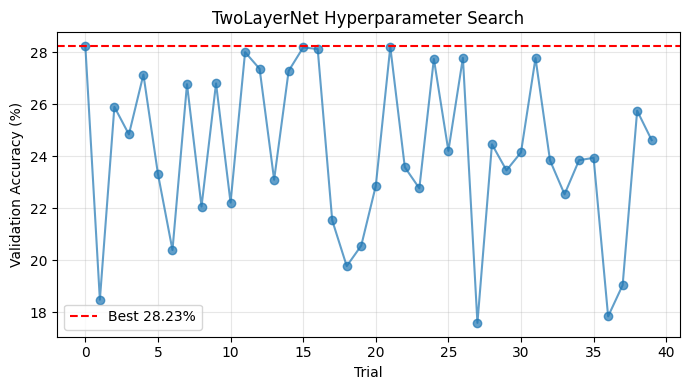

/var/folders/f8/pxlkkqvd2hngxdcrlqsbl_cm0000gn/T/ipykernel_23034/1062150164.py:289: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  fig = optuna.visualization.matplotlib.plot_param_importances(study)


Param importance plot unavailable (maybe insufficient completed trials).
Saved study artifacts:
  PKL: ./optuna_studies_may/twolayernet_20251015_220546.pkl
  CSV: ./optuna_studies_may/twolayernet_trials_20251015_220546.csv


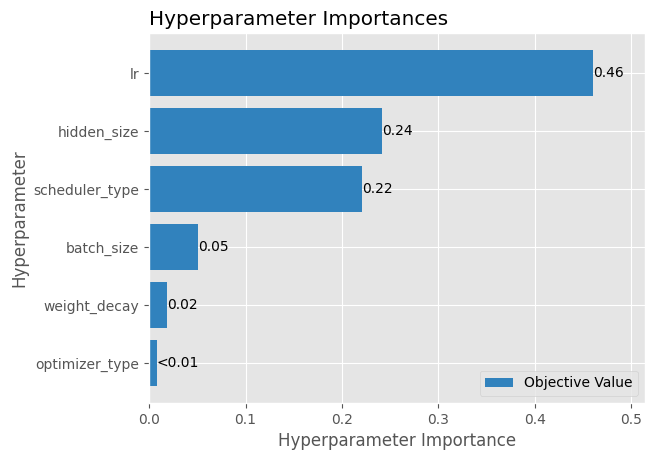

In [ ]:
# 7.3.1 TwoLayerNet Hyperparameter Optimization
study_twolayer = run_optuna_study(objective_twolayernet, 'TwoLayerNet_CIFAR100', n_trials=40)
visualize_and_save_study(study_twolayer, 'TwoLayerNet')


/Users/itay/miniconda3/envs/cv1/lib/python3.12/site-packages/optuna/samplers/_tpe/sampler.py:319: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-10-15 22:06:27,527] A new study created in memory with name: ConvNet_CIFAR100


  0%|          | 0/40 [00:00<?, ?it/s]

[Trial 0] Epoch 10/30 | TL 0.0131 | TA 20.11% | VA 18.67% | Best 18.67%
[Trial 0] Epoch 20/30 | TL 0.0122 | TA 24.57% | VA 22.06% | Best 22.26%
[Trial 0] Epoch 30/30 | TL 0.0120 | TA 25.73% | VA 22.68% | Best 22.85%
[I 2025-10-15 22:07:45,242] Trial 0 finished with value: 22.85 and parameters: {'lr': 0.0005611516415334506, 'weight_decay': 0.0007969454818643932, 'optimizer_type': 'adam', 'scheduler_type': 'cosine', 'batch_size': 256}. Best is trial 0 with value: 22.85.
[Trial 1] Epoch 10/30 | TL 0.0057 | TA 27.88% | VA 23.25% | Best 23.25%
[Trial 1] Epoch 20/30 | TL 0.0050 | TA 35.63% | VA 24.97% | Best 25.27%
[Trial 1] Epoch 30/30 | TL 0.0047 | TA 38.72% | VA 25.39% | Best 25.49%
[I 2025-10-15 22:08:56,352] Trial 1 finished with value: 25.49 and parameters: {'lr': 0.0026070247583707684, 'weight_decay': 1.0994335574766187e-05, 'optimizer_type': 'adam', 'scheduler_type': 'cosine', 'batch_size': 512}. Best is trial 1 with value: 25.49.
[Trial 2] Epoch 10/30 | TL 0.0124 | TA 23.55% | VA 21

IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-15 22:16:08,552] Trial 8 pruned. 
[Trial 9] Epoch 10/30 | TL 0.0115 | TA 27.41% | VA 23.30% | Best 23.34%
[I 2025-10-15 22:17:14,537] Trial 9 pruned. 
[Trial 10] Epoch 10/30 | TL 0.0111 | TA 29.45% | VA 22.72% | Best 22.79%
[I 2025-10-15 22:18:18,394] Trial 10 pruned. 
[Trial 11] Epoch 10/30 | TL 0.0056 | TA 29.24% | VA 23.39% | Best 23.39%
[I 2025-10-15 22:19:23,278] Trial 11 pruned. 
[I 2025-10-15 22:20:20,224] Trial 12 pruned. 
[I 2025-10-15 22:21:14,812] Trial 13 pruned. 
[I 2025-10-15 22:22:12,819] Trial 14 pruned. 
[I 2025-10-15 22:23:20,130] Trial 15 pruned. 
[I 2025-10-15 22:24:14,693] Trial 16 pruned. 
[Trial 17] Epoch 10/30 | TL 0.0059 | TA 26.23% | VA 22.93% | Best 22.93%
[Trial 17] Epoch 20/30 | TL 0.0053 | TA 32.53% | VA 25.06% | Best 25.06%
[Trial 17] Epoch 30/30 | TL 0.0051 | TA 34.61% | VA 25.21% | Best 25.21%
[I 2025-10-15 22:26:06,151] Trial 17 finished with value: 25.21 and parameters: {'lr': 0.001787408370199967, 'weight_decay': 5.571992188924636e-05, 'op

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-15 22:30:13,478] Trial 22 pruned. 
[Trial 23] Epoch 10/30 | TL 0.0058 | TA 27.42% | VA 23.12% | Best 23.12%
[I 2025-10-15 22:31:16,714] Trial 23 pruned. 


/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-035tmorq' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-zc0pb78p' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-k3lnhkm0' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-g8sqjyqm' might leak.
  war

[Trial 24] Epoch 10/30 | TL 0.0057 | TA 28.19% | VA 22.90% | Best 23.21%
[I 2025-10-15 22:32:18,271] Trial 24 pruned. 


/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-oefonl75' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-4560up63' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-fq1ffrfs' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-bhdrw_13' might leak.
  war

[I 2025-10-15 22:33:18,675] Trial 25 pruned. 
[I 2025-10-15 22:34:21,246] Trial 26 pruned. 
[Trial 27] Epoch 10/30 | TL 0.0056 | TA 28.73% | VA 23.60% | Best 23.60%
[Trial 27] Epoch 20/30 | TL 0.0047 | TA 38.60% | VA 26.35% | Best 26.35%
[Trial 27] Epoch 30/30 | TL 0.0043 | TA 44.17% | VA 26.93% | Best 27.04%
[I 2025-10-15 22:36:12,140] Trial 27 finished with value: 27.04 and parameters: {'lr': 0.005935690981168395, 'weight_decay': 0.0005811823433904545, 'optimizer_type': 'adam', 'scheduler_type': 'cosine', 'batch_size': 512}. Best is trial 27 with value: 27.04.
[Trial 28] Epoch 10/30 | TL 0.0059 | TA 26.10% | VA 22.60% | Best 22.60%
[Trial 28] Epoch 20/30 | TL 0.0049 | TA 36.40% | VA 26.96% | Best 27.16%
[Trial 28] Epoch 30/30 | TL 0.0044 | TA 42.98% | VA 28.01% | Best 28.03%
[I 2025-10-15 22:37:23,133] Trial 28 finished with value: 28.03 and parameters: {'lr': 0.008034100241237513, 'weight_decay': 0.0009215911057324961, 'optimizer_type': 'adam', 'scheduler_type': 'cosine', 'batch_siz

/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-cm7t4vzy' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-vhh0qz30' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-i_lmoiwb' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-0p23xkrw' might leak.
  war

[Trial 30] Epoch 10/30 | TL 0.0057 | TA 28.02% | VA 22.82% | Best 22.82%
[I 2025-10-15 22:38:36,206] Trial 30 pruned. 
[I 2025-10-15 22:39:30,695] Trial 31 pruned. 
[Trial 32] Epoch 10/30 | TL 0.0058 | TA 26.69% | VA 23.46% | Best 23.46%
[Trial 32] Epoch 20/30 | TL 0.0052 | TA 34.08% | VA 25.57% | Best 25.57%
[Trial 32] Epoch 30/30 | TL 0.0049 | TA 36.85% | VA 26.71% | Best 26.80%
[I 2025-10-15 22:41:22,327] Trial 32 finished with value: 26.8 and parameters: {'lr': 0.002929837505966734, 'weight_decay': 0.0009000048384279638, 'optimizer_type': 'adam', 'scheduler_type': 'cosine', 'batch_size': 512}. Best is trial 28 with value: 28.03.
[I 2025-10-15 22:41:36,717] Trial 33 pruned. 


IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-15 22:42:21,690] Trial 34 pruned. 
[Trial 35] Epoch 10/30 | TL 0.0113 | TA 28.14% | VA 23.84% | Best 23.84%
[Trial 35] Epoch 20/30 | TL 0.0095 | TA 37.96% | VA 27.23% | Best 27.23%
[Trial 35] Epoch 30/30 | TL 0.0086 | TA 43.73% | VA 28.07% | Best 28.12%
[I 2025-10-15 22:44:20,770] Trial 35 finished with value: 28.12 and parameters: {'lr': 0.004237899809192848, 'weight_decay': 0.0007341845578941327, 'optimizer_type': 'adam', 'scheduler_type': 'cosine', 'batch_size': 256}. Best is trial 35 with value: 28.12.
[I 2025-10-15 22:44:37,583] Trial 36 pruned. 
[Trial 37] Epoch 10/30 | TL 0.0120 | TA 25.76% | VA 22.70% | Best 22.70%
[I 2025-10-15 22:45:38,469] Trial 37 pruned. 
[Trial 38] Epoch 10/30 | TL 0.0057 | TA 28.37% | VA 23.21% | Best 23.21%
[Trial 38] Epoch 20/30 | TL 0.0048 | TA 37.46% | VA 25.87% | Best 25.87%
[Trial 38] Epoch 30/30 | TL 0.0045 | TA 41.84% | VA 26.30% | Best 26.46%
[I 2025-10-15 22:47:30,145] Trial 38 finished with value: 26.46 and parameters: {'lr': 0.0041

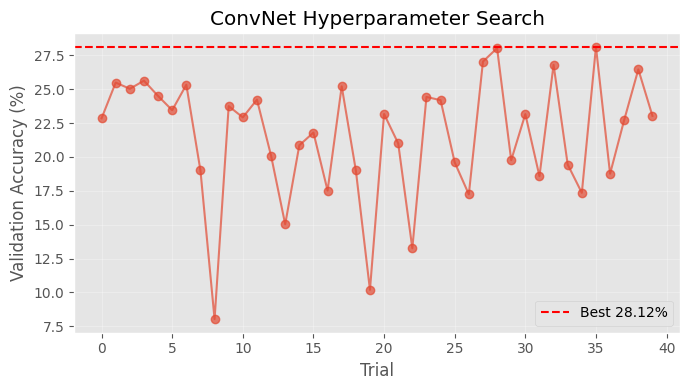

Param importance plot unavailable (maybe insufficient completed trials).
Saved study artifacts:
  PKL: ./optuna_studies_may/convnet_20251015_224750.pkl
  CSV: ./optuna_studies_may/convnet_trials_20251015_224750.csv


/var/folders/f8/pxlkkqvd2hngxdcrlqsbl_cm0000gn/T/ipykernel_23034/1062150164.py:289: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  fig = optuna.visualization.matplotlib.plot_param_importances(study)


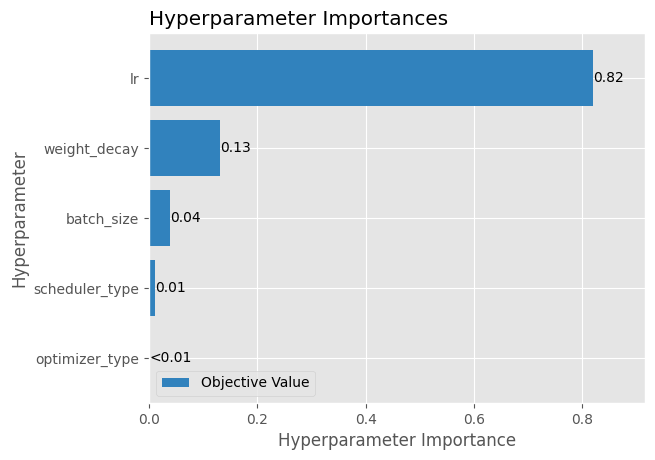

In [ ]:
# 7.3.2 ConvNet Hyperparameter Optimization
study_conv = run_optuna_study(objective_convnet, 'ConvNet_CIFAR100', n_trials=40)
visualize_and_save_study(study_conv, 'ConvNet')


/Users/itay/miniconda3/envs/cv1/lib/python3.12/site-packages/optuna/samplers/_tpe/sampler.py:319: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-10-15 22:48:30,963] A new study created in memory with name: ExtendedTwoLayerNet_CIFAR100


  0%|          | 0/160 [00:00<?, ?it/s]

[Trial 0] Epoch 10/50 | TL 0.0101 | TA 33.79% | VA 26.17% | Best 27.14%
[Trial 0] Epoch 20/50 | TL 0.0073 | TA 49.12% | VA 29.17% | Best 29.29%
[Trial 0] Epoch 30/50 | TL 0.0050 | TA 64.24% | VA 30.33% | Best 30.52%
[Trial 0] Epoch 40/50 | TL 0.0036 | TA 73.85% | VA 31.12% | Best 31.12%
[Trial 0] Epoch 50/50 | TL 0.0032 | TA 77.42% | VA 31.23% | Best 31.35%
[I 2025-10-15 22:50:04,913] Trial 0 finished with value: 31.35 and parameters: {'lr': 0.0005611516415334506, 'weight_decay': 0.0007969454818643932, 'optimizer_type': 'adam', 'scheduler_type': 'cosine', 'batch_size': 256, 'h1': 1024, 'h2': 512, 'h3': 256, 'dropout': 0.15502135295603015}. Best is trial 0 with value: 31.35.
[Trial 1] Epoch 10/50 | TL 0.0046 | TA 38.48% | VA 28.26% | Best 28.26%
[Trial 1] Epoch 20/50 | TL 0.0027 | TA 61.51% | VA 29.80% | Best 29.84%
[Trial 1] Epoch 30/50 | TL 0.0016 | TA 76.22% | VA 29.93% | Best 30.32%
[Trial 1] Epoch 40/50 | TL 0.0012 | TA 83.26% | VA 30.36% | Best 30.42%
[Trial 1] Epoch 50/50 | TL 0.

IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-15 22:58:17,551] Trial 6 pruned. 
[I 2025-10-15 22:59:18,335] Trial 7 pruned. 
[I 2025-10-15 23:00:18,628] Trial 8 pruned. 
[I 2025-10-15 23:01:20,076] Trial 9 pruned. 
[I 2025-10-15 23:02:15,931] Trial 10 pruned. 


IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-15 23:02:52,551] Trial 11 pruned. 
[I 2025-10-15 23:03:46,175] Trial 12 pruned. 
[I 2025-10-15 23:04:41,495] Trial 13 pruned. 
[I 2025-10-15 23:05:36,628] Trial 14 pruned. 
[I 2025-10-15 23:06:32,221] Trial 15 pruned. 


IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-15 23:07:11,073] Trial 16 pruned. 
[I 2025-10-15 23:08:04,951] Trial 17 pruned. 


IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-15 23:08:46,830] Trial 18 pruned. 
[I 2025-10-15 23:09:41,282] Trial 19 pruned. 
[I 2025-10-15 23:10:36,857] Trial 20 pruned. 


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-15 23:11:28,377] Trial 21 pruned. 
[I 2025-10-15 23:12:28,283] Trial 22 pruned. 
[I 2025-10-15 23:13:28,369] Trial 23 pruned. 
[I 2025-10-15 23:14:28,349] Trial 24 pruned. 
[I 2025-10-15 23:15:23,703] Trial 25 pruned. 


IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-15 23:16:02,180] Trial 26 pruned. 
[I 2025-10-15 23:16:57,604] Trial 27 pruned. 
[Trial 28] Epoch 10/50 | TL 0.0039 | TA 46.84% | VA 27.37% | Best 27.78%
[I 2025-10-15 23:17:54,576] Trial 28 pruned. 


IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-15 23:18:37,331] Trial 29 pruned. 
[I 2025-10-15 23:19:31,295] Trial 30 pruned. 
[Trial 31] Epoch 10/50 | TL 0.0163 | TA 44.73% | VA 28.58% | Best 28.58%
[Trial 31] Epoch 20/50 | TL 0.0078 | TA 70.87% | VA 28.69% | Best 29.59%
[I 2025-10-15 23:21:04,102] Trial 31 pruned. 
[I 2025-10-15 23:21:57,807] Trial 32 pruned. 
[I 2025-10-15 23:23:02,362] Trial 33 pruned. 


/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-he28qv4a' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-tbzb66qo' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-isr19r21' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-n9wjc50f' might leak.
  war

[Trial 34] Epoch 10/50 | TL 0.0042 | TA 42.57% | VA 28.35% | Best 28.35%
[Trial 34] Epoch 20/50 | TL 0.0021 | TA 69.07% | VA 28.38% | Best 28.85%
[I 2025-10-15 23:39:58,986] Trial 34 pruned. 
[I 2025-10-15 23:40:56,278] Trial 35 pruned. 


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


[Trial 36] Epoch 10/50 | TL 0.0146 | TA 49.08% | VA 27.70% | Best 27.70%
[I 2025-10-15 23:42:20,952] Trial 36 pruned. 
[I 2025-10-15 23:43:25,308] Trial 37 pruned. 
[Trial 38] Epoch 10/50 | TL 0.0043 | TA 42.31% | VA 27.96% | Best 27.96%
[Trial 38] Epoch 20/50 | TL 0.0021 | TA 69.54% | VA 29.17% | Best 29.17%
[I 2025-10-15 23:44:37,331] Trial 38 pruned. 
[Trial 39] Epoch 10/50 | TL 0.0069 | TA 52.16% | VA 28.40% | Best 28.40%
[Trial 39] Epoch 20/50 | TL 0.0023 | TA 82.89% | VA 28.33% | Best 28.80%
[I 2025-10-15 23:46:01,396] Trial 39 pruned. 
[Trial 40] Epoch 10/50 | TL 0.0154 | TA 46.64% | VA 27.65% | Best 27.65%
[I 2025-10-15 23:47:28,325] Trial 40 pruned. 
[I 2025-10-15 23:48:25,812] Trial 41 pruned. 
[I 2025-10-15 23:49:20,432] Trial 42 pruned. 
[I 2025-10-15 23:50:21,812] Trial 43 pruned. 


IOStream.flush timed out
IOStream.flush timed out


[Trial 44] Epoch 10/50 | TL 0.0039 | TA 46.90% | VA 27.38% | Best 27.38%
[I 2025-10-15 23:51:05,159] Trial 44 pruned. 
[I 2025-10-15 23:52:06,119] Trial 45 pruned. 


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-15 23:52:55,265] Trial 46 pruned. 


IOStream.flush timed out
IOStream.flush timed out


[Trial 47] Epoch 10/50 | TL 0.0165 | TA 43.76% | VA 28.59% | Best 28.59%
[Trial 47] Epoch 20/50 | TL 0.0085 | TA 68.21% | VA 28.11% | Best 28.84%
[I 2025-10-15 23:54:11,983] Trial 47 pruned. 
[Trial 48] Epoch 10/50 | TL 0.0068 | TA 52.65% | VA 28.24% | Best 28.34%
[Trial 48] Epoch 20/50 | TL 0.0020 | TA 85.62% | VA 29.05% | Best 29.10%
[I 2025-10-15 23:55:44,860] Trial 48 pruned. 
[I 2025-10-15 23:56:42,767] Trial 49 pruned. 
[I 2025-10-15 23:57:44,441] Trial 50 pruned. 
[I 2025-10-15 23:58:43,024] Trial 51 pruned. 
[Trial 52] Epoch 10/50 | TL 0.0066 | TA 53.57% | VA 28.40% | Best 28.40%
[Trial 52] Epoch 20/50 | TL 0.0018 | TA 86.73% | VA 28.48% | Best 29.22%
[I 2025-10-16 00:00:15,487] Trial 52 pruned. 
[Trial 53] Epoch 10/50 | TL 0.0081 | TA 45.17% | VA 28.89% | Best 28.89%
[Trial 53] Epoch 20/50 | TL 0.0036 | TA 73.54% | VA 28.44% | Best 29.18%
[I 2025-10-16 00:01:37,350] Trial 53 pruned. 
[I 2025-10-16 00:02:36,270] Trial 54 pruned. 
[I 2025-10-16 00:03:39,566] Trial 55 pruned. 
[I

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-16 00:32:49,195] Trial 73 pruned. 


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-16 00:33:51,601] Trial 74 pruned. 


IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-16 00:34:30,326] Trial 75 pruned. 
[I 2025-10-16 00:35:33,322] Trial 76 pruned. 
[I 2025-10-16 00:36:32,246] Trial 77 pruned. 
[I 2025-10-16 00:37:29,899] Trial 78 pruned. 
[I 2025-10-16 00:38:32,381] Trial 79 pruned. 
[I 2025-10-16 00:39:28,036] Trial 80 pruned. 
[I 2025-10-16 00:40:30,913] Trial 81 pruned. 
[I 2025-10-16 00:41:34,605] Trial 82 pruned. 
[I 2025-10-16 00:42:37,866] Trial 83 pruned. 


/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-kvepvja4' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-uj88xk04' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-83r1jm41' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-i8s7lxoq' might leak.
  war

[Trial 84] Epoch 10/50 | TL 0.0174 | TA 41.55% | VA 27.88% | Best 28.62%
[I 2025-10-16 00:44:01,020] Trial 84 pruned. 


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-16 00:44:57,102] Trial 85 pruned. 
[I 2025-10-16 00:45:55,023] Trial 86 pruned. 
[I 2025-10-16 00:46:52,205] Trial 87 pruned. 


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-16 00:47:42,646] Trial 88 pruned. 
[I 2025-10-16 00:48:45,634] Trial 89 pruned. 
[I 2025-10-16 00:49:44,796] Trial 90 pruned. 


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


[Trial 91] Epoch 10/50 | TL 0.0179 | TA 39.87% | VA 28.14% | Best 28.14%
[I 2025-10-16 00:50:50,330] Trial 91 pruned. 
[I 2025-10-16 00:51:47,537] Trial 92 pruned. 
[I 2025-10-16 00:52:44,977] Trial 93 pruned. 
[I 2025-10-16 00:53:42,669] Trial 94 pruned. 
[I 2025-10-16 01:10:03,639] Trial 95 pruned. 
[I 2025-10-16 01:18:44,946] Trial 96 pruned. 
[Trial 97] Epoch 10/50 | TL 0.0079 | TA 45.78% | VA 27.60% | Best 27.85%
[I 2025-10-16 01:35:13,058] Trial 97 pruned. 
[I 2025-10-16 01:36:10,315] Trial 98 pruned. 
[I 2025-10-16 01:37:10,056] Trial 99 pruned. 
[I 2025-10-16 01:38:07,551] Trial 100 pruned. 
[Trial 101] Epoch 10/50 | TL 0.0080 | TA 46.06% | VA 27.84% | Best 27.84%
[I 2025-10-16 01:39:12,696] Trial 101 pruned. 
[I 2025-10-16 01:40:11,465] Trial 102 pruned. 


IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-16 01:40:56,509] Trial 103 pruned. 
[Trial 104] Epoch 10/50 | TL 0.0090 | TA 39.84% | VA 28.22% | Best 28.25%
[Trial 104] Epoch 20/50 | TL 0.0050 | TA 63.92% | VA 29.70% | Best 29.70%
[I 2025-10-16 01:42:22,162] Trial 104 pruned. 
[I 2025-10-16 01:43:22,577] Trial 105 pruned. 
[I 2025-10-16 01:44:20,460] Trial 106 pruned. 
[I 2025-10-16 01:45:21,943] Trial 107 pruned. 
[I 2025-10-16 01:46:17,272] Trial 108 pruned. 
[I 2025-10-16 01:47:20,633] Trial 109 pruned. 
[I 2025-10-16 01:48:16,107] Trial 110 pruned. 
[Trial 111] Epoch 10/50 | TL 0.0078 | TA 46.27% | VA 27.86% | Best 27.86%
[I 2025-10-16 01:49:20,141] Trial 111 pruned. 
[I 2025-10-16 01:50:22,452] Trial 112 pruned. 


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-16 01:51:16,633] Trial 113 pruned. 
[I 2025-10-16 01:52:18,181] Trial 114 pruned. 


IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-16 01:52:58,329] Trial 115 pruned. 
[Trial 116] Epoch 10/50 | TL 0.0152 | TA 47.90% | VA 28.19% | Best 28.31%
[I 2025-10-16 01:54:20,947] Trial 116 pruned. 
[Trial 117] Epoch 10/50 | TL 0.0134 | TA 53.00% | VA 27.28% | Best 27.84%
[I 2025-10-16 01:55:34,671] Trial 117 pruned. 
[I 2025-10-16 01:56:32,297] Trial 118 pruned. 
[I 2025-10-16 01:57:29,296] Trial 119 pruned. 


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-16 01:58:17,247] Trial 120 pruned. 
[Trial 121] Epoch 10/50 | TL 0.0071 | TA 50.73% | VA 28.43% | Best 28.43%
[I 2025-10-16 01:59:28,977] Trial 121 pruned. 
[I 2025-10-16 02:00:27,468] Trial 122 pruned. 


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-16 02:01:18,500] Trial 123 pruned. 
[I 2025-10-16 02:02:14,099] Trial 124 pruned. 
[I 2025-10-16 02:03:16,914] Trial 125 pruned. 
[I 2025-10-16 02:04:19,789] Trial 126 pruned. 


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-16 02:05:14,906] Trial 127 pruned. 
[I 2025-10-16 02:06:16,786] Trial 128 pruned. 
[Trial 129] Epoch 10/50 | TL 0.0083 | TA 43.41% | VA 28.43% | Best 28.43%
[I 2025-10-16 02:07:32,265] Trial 129 pruned. 
[I 2025-10-16 02:08:37,899] Trial 130 pruned. 
[Trial 131] Epoch 10/50 | TL 0.0172 | TA 42.27% | VA 28.24% | Best 28.30%
[Trial 131] Epoch 20/50 | TL 0.0090 | TA 67.49% | VA 29.20% | Best 29.63%
[I 2025-10-16 02:10:35,616] Trial 131 pruned. 
[I 2025-10-16 02:11:44,261] Trial 132 pruned. 


IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-16 02:12:25,219] Trial 133 pruned. 
[Trial 134] Epoch 10/50 | TL 0.0174 | TA 41.38% | VA 27.89% | Best 27.89%
[I 2025-10-16 02:13:53,462] Trial 134 pruned. 
[I 2025-10-16 02:30:19,000] Trial 135 pruned. 
[I 2025-10-16 02:46:27,722] Trial 136 pruned. 
[I 2025-10-16 02:47:23,798] Trial 137 pruned. 
[I 2025-10-16 02:48:23,737] Trial 138 pruned. 


IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-16 02:49:04,567] Trial 139 pruned. 
[I 2025-10-16 02:50:02,860] Trial 140 pruned. 
[I 2025-10-16 02:50:59,225] Trial 141 pruned. 


/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-x8k71a0l' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-6sjbgrjz' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-m1b2bu1h' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-3hkr7p4j' might leak.
  war

[I 2025-10-16 02:52:02,575] Trial 142 pruned. 
[I 2025-10-16 02:53:05,838] Trial 143 pruned. 


IOStream.flush timed out
IOStream.flush timed out


[Trial 144] Epoch 10/50 | TL 0.0154 | TA 47.33% | VA 28.22% | Best 28.75%
[I 2025-10-16 02:54:17,090] Trial 144 pruned. 
[I 2025-10-16 02:55:18,634] Trial 145 pruned. 
[I 2025-10-16 02:56:16,853] Trial 146 pruned. 
[I 2025-10-16 02:57:18,213] Trial 147 pruned. 


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-16 02:58:08,156] Trial 148 pruned. 
[I 2025-10-16 02:59:11,293] Trial 149 pruned. 
[Trial 150] Epoch 10/50 | TL 0.0185 | TA 38.90% | VA 28.22% | Best 28.22%
[Trial 150] Epoch 20/50 | TL 0.0113 | TA 60.06% | VA 30.44% | Best 30.44%
[Trial 150] Epoch 30/50 | TL 0.0070 | TA 74.76% | VA 30.44% | Best 30.79%
[Trial 150] Epoch 40/50 | TL 0.0050 | TA 82.06% | VA 30.89% | Best 30.89%
[Trial 150] Epoch 50/50 | TL 0.0045 | TA 84.38% | VA 30.80% | Best 31.00%
[I 2025-10-16 03:02:36,603] Trial 150 finished with value: 31.0 and parameters: {'lr': 0.00018429478707795768, 'weight_decay': 0.0003038881724156911, 'optimizer_type': 'adam', 'scheduler_type': 'cosine', 'batch_size': 128, 'h1': 1536, 'h2': 768, 'h3': 384, 'dropout': 0.16800003454251736}. Best is trial 67 with value: 31.76.
[Trial 151] Epoch 10/50 | TL 0.0144 | TA 50.24% | VA 28.56% | Best 28.82%
[I 2025-10-16 03:03:22,809] Trial 151 pruned. 
[Trial 152] Epoch 10/50 | TL 0.0178 | TA 40.45% | VA 28.36% | Best 28.36%
[Trial 152] Epo

IOStream.flush timed out
IOStream.flush timed out


[Trial 154] Epoch 10/50 | TL 0.0178 | TA 40.25% | VA 28.16% | Best 28.16%
[Trial 154] Epoch 20/50 | TL 0.0100 | TA 63.98% | VA 29.80% | Best 30.43%
[Trial 154] Epoch 30/50 | TL 0.0056 | TA 79.63% | VA 30.79% | Best 30.79%
[Trial 154] Epoch 40/50 | TL 0.0037 | TA 87.06% | VA 31.16% | Best 31.16%
[Trial 154] Epoch 50/50 | TL 0.0032 | TA 89.34% | VA 31.53% | Best 31.57%
[I 2025-10-16 03:09:50,848] Trial 154 finished with value: 31.57 and parameters: {'lr': 0.0002509342150176761, 'weight_decay': 0.0003399479916520615, 'optimizer_type': 'adam', 'scheduler_type': 'cosine', 'batch_size': 128, 'h1': 1536, 'h2': 768, 'h3': 384, 'dropout': 0.18273200582532292}. Best is trial 67 with value: 31.76.
[I 2025-10-16 03:10:14,736] Trial 155 pruned. 
[I 2025-10-16 03:11:11,504] Trial 156 pruned. 
[I 2025-10-16 03:12:15,563] Trial 157 pruned. 


/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-jmn5p_yo' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-l6d9cirz' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-sf8k2yzg' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-dyijyeob' might leak.
  war

[I 2025-10-16 03:13:10,496] Trial 158 pruned. 


IOStream.flush timed out
IOStream.flush timed out


[I 2025-10-16 03:13:55,941] Trial 159 pruned. 

ExtendedTwoLayerNet_CIFAR100 RESULTS
Best Trial #67 | Best Val Acc: 31.76%
  lr: 0.0002437489637657272
  weight_decay: 0.000774829346704289
  optimizer_type: adam
  scheduler_type: cosine
  batch_size: 128
  h1: 1536
  h2: 768
  h3: 384
  dropout: 0.1646734417343791


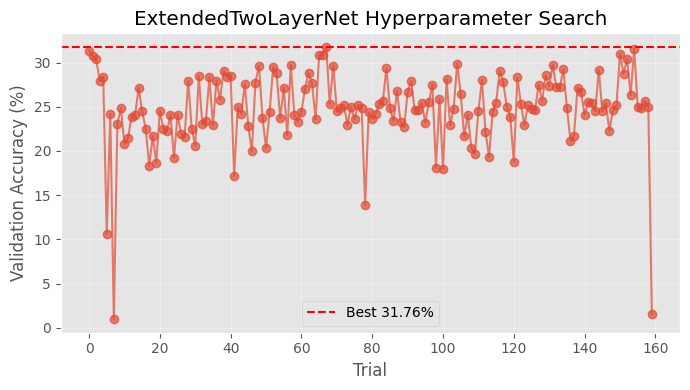

/var/folders/f8/pxlkkqvd2hngxdcrlqsbl_cm0000gn/T/ipykernel_23034/1062150164.py:289: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  fig = optuna.visualization.matplotlib.plot_param_importances(study)
/Users/itay/miniconda3/envs/cv1/lib/python3.12/site-packages/optuna/samplers/_tpe/sampler.py:319: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-10-16 03:14:36,217] A new study created in memory with name: ExtendedConvNet_CIFAR100


Param importance plot unavailable (maybe insufficient completed trials).
Saved study artifacts:
  PKL: ./optuna_studies_may/extendedtwolayernet_20251016_031355.pkl
  CSV: ./optuna_studies_may/extendedtwolayernet_trials_20251016_031355.csv


  0%|          | 0/160 [00:00<?, ?it/s]

[W 2025-10-16 03:14:41,967] Trial 0 failed with parameters: {'lr': 0.0005611516415334506, 'weight_decay': 0.0007969454818643932, 'optimizer_type': 'adam', 'scheduler_type': 'cosine', 'batch_size': 256, 'fc_mid': 256, 'dropout': 0.34973279224012654, 'dropout2d': 0.16370173320348286} because of the following error: RuntimeError('linear(): input and weight.T shapes cannot be multiplied (256x4608 and 512x256)').
Traceback (most recent call last):
  File "/Users/itay/miniconda3/envs/cv1/lib/python3.12/site-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/var/folders/f8/pxlkkqvd2hngxdcrlqsbl_cm0000gn/T/ipykernel_23034/1062150164.py", line 236, in objective_extended_convnet
    best_acc = train_trial_with_pruning(
               ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/f8/pxlkkqvd2hngxdcrlqsbl_cm0000gn/T/ipykernel_23034/1062150164.py", line 86, in train_trial_with_pruning
    out = training_step(
  

RuntimeError: linear(): input and weight.T shapes cannot be multiplied (256x4608 and 512x256)

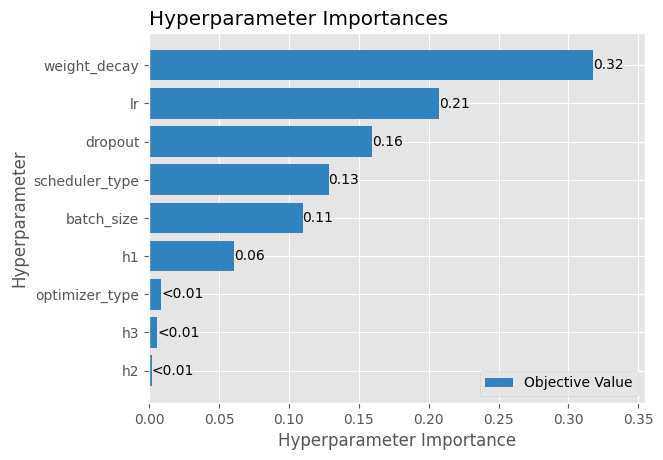

In [ ]:
# 7.3.3 ExtendedTwoLayerNet Hyperparameter Optimization
study_ext_fc = run_optuna_study(objective_extended_twolayernet, 'ExtendedTwoLayerNet_CIFAR100', n_trials=160)
visualize_and_save_study(study_ext_fc, 'ExtendedTwoLayerNet')

/Users/itay/miniconda3/envs/cv1/lib/python3.12/site-packages/optuna/samplers/_tpe/sampler.py:319: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-10-16 09:45:43,650] A new study created in memory with name: ExtendedConvNet_CIFAR100


  0%|          | 0/160 [00:00<?, ?it/s]

[Trial 0] Epoch 10/50 | TL 0.0089 | TA 39.96% | VA 39.39% | Best 39.39%
[Trial 0] Epoch 20/50 | TL 0.0067 | TA 52.54% | VA 44.86% | Best 44.97%
[Trial 0] Epoch 30/50 | TL 0.0044 | TA 67.85% | VA 47.42% | Best 47.42%
[Trial 0] Epoch 40/50 | TL 0.0026 | TA 80.71% | VA 48.43% | Best 48.43%
[Trial 0] Epoch 50/50 | TL 0.0021 | TA 84.83% | VA 48.89% | Best 48.89%
[I 2025-10-16 09:53:42,683] Trial 0 finished with value: 48.89 and parameters: {'lr': 0.0005611516415334506, 'weight_decay': 0.0007969454818643932, 'optimizer_type': 'adam', 'scheduler_type': 'cosine', 'batch_size': 256, 'fc_mid': 256, 'dropout': 0.34973279224012654, 'dropout2d': 0.16370173320348286}. Best is trial 0 with value: 48.89.
[Trial 1] Epoch 10/50 | TL 0.0171 | TA 42.32% | VA 41.09% | Best 41.09%
[Trial 1] Epoch 20/50 | TL 0.0119 | TA 57.74% | VA 45.64% | Best 45.64%
[Trial 1] Epoch 30/50 | TL 0.0080 | TA 70.32% | VA 46.08% | Best 46.36%
[Trial 1] Epoch 40/50 | TL 0.0060 | TA 77.82% | VA 46.62% | Best 46.98%
[Trial 1] Epoc

/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-onso0z_d' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-10zafze9' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-9u9e1oyj' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-2w3lac55' might leak.
  war

[I 2025-10-16 19:11:18,939] Trial 140 pruned. 
[I 2025-10-16 19:13:04,533] Trial 141 pruned. 
[Trial 142] Epoch 10/50 | TL 0.0152 | TA 47.58% | VA 42.47% | Best 42.70%
[Trial 142] Epoch 20/50 | TL 0.0075 | TA 71.10% | VA 45.73% | Best 45.88%
[I 2025-10-16 19:16:59,836] Trial 142 pruned. 
[I 2025-10-16 19:19:11,580] Trial 143 pruned. 
[Trial 144] Epoch 10/50 | TL 0.0151 | TA 47.99% | VA 42.87% | Best 43.24%
[Trial 144] Epoch 20/50 | TL 0.0081 | TA 69.62% | VA 46.23% | Best 46.23%
[Trial 144] Epoch 30/50 | TL 0.0038 | TA 85.33% | VA 46.99% | Best 46.99%
[I 2025-10-16 19:26:05,707] Trial 144 pruned. 
[Trial 145] Epoch 10/50 | TL 0.0148 | TA 48.82% | VA 42.09% | Best 42.09%
[I 2025-10-16 19:29:30,568] Trial 145 pruned. 
[Trial 146] Epoch 10/50 | TL 0.0145 | TA 49.54% | VA 43.34% | Best 43.34%
[Trial 146] Epoch 20/50 | TL 0.0066 | TA 74.81% | VA 46.22% | Best 46.26%
[I 2025-10-16 19:35:14,911] Trial 146 pruned. 
[I 2025-10-16 19:37:10,496] Trial 147 pruned. 
[I 2025-10-16 19:39:00,234] Tria

/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-lb5t08n6' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-zbusm6er' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-c20gk3n3' might leak.
  warnings.warn(
/Users/itay/miniconda3/envs/cv1/lib/python3.12/multiprocessing/resource_tracker.py:188: UserWarning: ResourceTracker called reentrantly for resource cleanup, which is unsupported. The semaphore object '/loky-23034-pj0t1o6i' might leak.
  war

[I 2025-10-16 19:59:06,572] Trial 153 pruned. 
[Trial 154] Epoch 10/50 | TL 0.0082 | TA 44.37% | VA 41.36% | Best 41.36%
[I 2025-10-16 20:02:16,503] Trial 154 pruned. 
[I 2025-10-16 20:04:30,872] Trial 155 pruned. 
[I 2025-10-16 20:06:18,334] Trial 156 pruned. 
[I 2025-10-16 20:08:07,376] Trial 157 pruned. 
[I 2025-10-16 20:09:57,282] Trial 158 pruned. 
[Trial 159] Epoch 10/50 | TL 0.0157 | TA 46.16% | VA 42.64% | Best 42.64%
[Trial 159] Epoch 20/50 | TL 0.0087 | TA 67.70% | VA 46.23% | Best 46.23%
[Trial 159] Epoch 30/50 | TL 0.0043 | TA 83.42% | VA 47.41% | Best 47.41%
[Trial 159] Epoch 40/50 | TL 0.0026 | TA 90.06% | VA 47.32% | Best 47.41%
[I 2025-10-16 20:18:38,969] Trial 159 pruned. 

ExtendedConvNet_CIFAR100 RESULTS
Best Trial #14 | Best Val Acc: 48.99%
  lr: 0.0010436570509116535
  weight_decay: 0.0004038749088599552
  optimizer_type: adam
  scheduler_type: cosine
  batch_size: 256
  fc_mid: 192
  dropout: 0.33333794333085626
  dropout2d: 0.12267918801224734


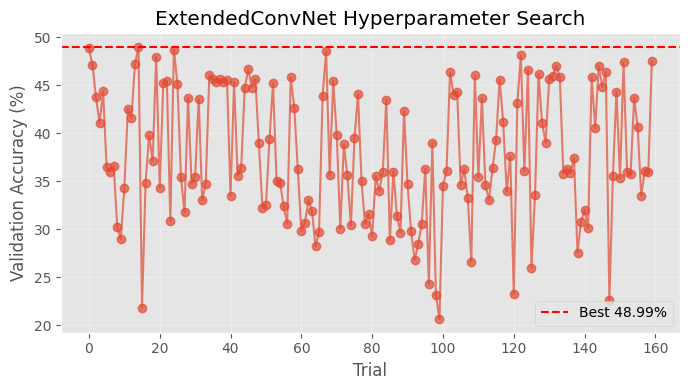

/var/folders/f8/pxlkkqvd2hngxdcrlqsbl_cm0000gn/T/ipykernel_23034/1062150164.py:289: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  fig = optuna.visualization.matplotlib.plot_param_importances(study)


Param importance plot unavailable (maybe insufficient completed trials).
Saved study artifacts:
  PKL: ./optuna_studies_may/extendedconvnet_20251016_201838.pkl
  CSV: ./optuna_studies_may/extendedconvnet_trials_20251016_201838.csv


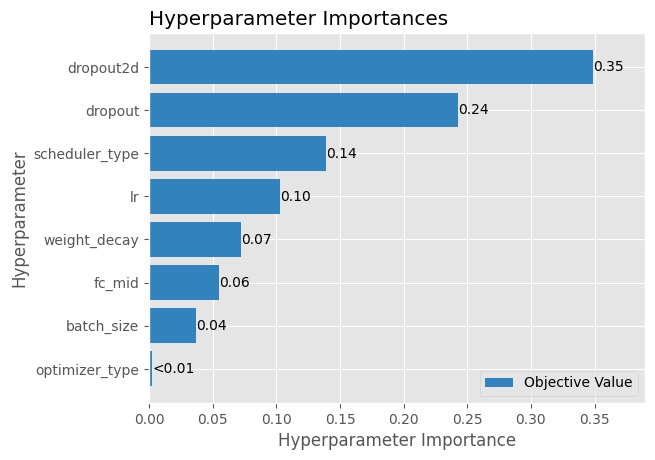

In [ ]:
# 7.3.4 ExtendedConvNet Hyperparameter Optimization
study_ext_conv = run_optuna_study(objective_extended_convnet, 'ExtendedConvNet_CIFAR100', n_trials=160)
visualize_and_save_study(study_ext_conv, 'ExtendedConvNet')

In [16]:
def load_best_params_from_study(model_name, optuna_dir='optuna_studies'):
    """
    Load the best hyperparameters from a saved Optuna study file.
    
    Args:
        model_name: Name of the model (e.g., 'TwoLayerNet', 'ConvNet')
        optuna_dir: Directory containing saved Optuna study files
    
    Returns:
        dict: Best hyperparameters from the study
    """
    # Find the study file for this model
    pattern = f"{optuna_dir}/{model_name.lower()}_*.pkl"
    study_files = glob.glob(pattern)
    
    if not study_files:
        raise FileNotFoundError(f"No Optuna study file found for {model_name} in {optuna_dir}")
    
    # Use the most recent study file
    study_file = sorted(study_files)[-1]
    print(f"Loading hyperparameters from: {study_file}")
    
    # Load the study
    study = joblib.load(study_file)
    
    # Get best parameters
    best_params = study.best_params
    best_value = study.best_value
    
    print(f"  Best validation accuracy: {best_value:.2f}%")
    print(f"  Best parameters: {best_params}")
    
    return best_params, best_value

def build_model_from_params(model_name, params):
    """
    Build a model instance given the model name and hyperparameters.
    
    Args:
        model_name: Name of the model
        params: Dictionary of hyperparameters
    
    Returns:
        nn.Module: Instantiated model
    """
    if model_name == 'TwoLayerNet':
        return TwoLayerNet(
            input_size=3*32*32,
            hidden_size=params['hidden_size'],
            num_classes=100
        )
    elif model_name == 'ConvNet':
        return ConvNet()
    elif model_name == 'ExtendedTwoLayerNet':
        return ExtendedTwoLayerNet(
            h1=params['h1'],
            h2=params['h2'],
            h3=params['h3'],
            dropout=params['dropout']
        )
    elif model_name == 'ExtendedConvNet':
        return ExtendedConvNet(
            fc_mid=params['fc_mid'],
            dropout=params['dropout']
        )
    else:
        raise ValueError(f"Unknown model name: {model_name}")

print("Helper functions for loading Optuna studies defined successfully")


Helper functions for loading Optuna studies defined successfully


#### 7.4 Final Training with Optimized Hyperparameters

The following cell trains all models using the best hyperparameters found by Optuna. Each model is trained on the full training set (50,000 samples) and evaluated on the test set (10,000 samples) for 100 epochs.


In [18]:
# Final training with optimized hyperparameters loaded from saved Optuna studies

# Configuration
FINAL_EPOCHS = 100
OPTUNA_DIR = 'optuna_studies'
os.makedirs('models', exist_ok=True)
os.makedirs('checkpoints', exist_ok=True)

# Timestamp for this training run
timestamp = dt.now().strftime('%Y-%m-%d_%H-%M-%S')

# Model specifications to train
model_specs = [
    'TwoLayerNet',
    'ConvNet',
    'ExtendedTwoLayerNet',
    'ExtendedConvNet'
]

# Storage for results
final_opt_results = {}

# Main training loop
for model_name in model_specs:
    print("\n" + "="*80)
    print(f"FINAL TRAINING: {model_name}")
    print("="*80)
    
    try:
        # Load best hyperparameters from saved Optuna study
        best_params, best_val_acc = load_best_params_from_study(model_name, OPTUNA_DIR)
        
        # Extract hyperparameters
        lr = best_params.get('lr')
        weight_decay = best_params.get('weight_decay')
        optimizer_type = best_params.get('optimizer_type')
        scheduler_type = best_params.get('scheduler_type', 'none')
        batch_size = best_params.get('batch_size', 128)
        
        # Build model
        model = build_model_from_params(model_name, best_params)
        
        # Create data loaders for final training
        train_loader_final, test_loader_final = create_trial_dataloaders(
            batch_size,
            train_dataset=train_dataset,
            val_dataset=val_dataset,
            test_dataset=test_dataset,
            full_train_dataset=full_train_dataset,
            final_eval=True
        )
        
        # Create TensorBoard writer
        writer = SummaryWriter(f'runs/{model_name.lower()}/{timestamp}')
        
        # Train the model
        print(f"\nTraining {model_name} for {FINAL_EPOCHS} epochs...")
        history = run_training_tb(
            model,
            train_loader_final,
            test_loader_final,
            epochs=FINAL_EPOCHS,
            lr=lr,
            writer=writer,
            weight_decay=weight_decay,
            optimizer_type=optimizer_type,
            scheduler_type=scheduler_type,
            criterion=nn.CrossEntropyLoss(),
            checkpoint_dir='checkpoints',
            checkpoint_name=f'{model_name.lower()}_final_best',
            verbose=True
        )
        
        # Save final model and get best accuracy from checkpoint
        best_acc = model.best_checkpoint['val_acc']
        best_loss = model.best_checkpoint['val_loss']
        best_epoch = model.best_checkpoint['epoch']
        save_path = f"models/{model_name.lower()}_final_full.pth"
        torch.save(model.state_dict(), save_path)
        
        print(f"\n[{model_name}] Best Validation Accuracy: {best_acc:.2f}% (Epoch {best_epoch})")
        print(f"[{model_name}] Best Validation Loss: {best_loss:.4f}")
        print(f"Saved model weights to: {save_path}")
        
        # Store results
        final_opt_results[model_name] = {
            'final_test_acc': best_acc,
            'final_test_loss': best_loss,
            'best_val_acc_from_optuna': best_val_acc,
            'history': history,
            'weights': save_path,
            'best_params': best_params
        }
        
        writer.close()
        
    except FileNotFoundError as e:
        print(f"\n[ERROR] {e}")
        print(f"Skipping {model_name}...\n")
        continue
    except Exception as e:
        print(f"\n[ERROR] Failed to train {model_name}: {e}")
        print(f"Skipping {model_name}...\n")
        continue

# Results comparison table
print("\n" + "="*80)
print("FINAL MODEL COMPARISON")
print("="*80)
print(f"{'Model':<25} {'Test Accuracy':>15} {'Test Loss':>12}")
print("-"*80)

for model_name in model_specs:
    if model_name in final_opt_results:
        result = final_opt_results[model_name]
        acc = result['final_test_acc']
        loss = result['final_test_loss']
        print(f"{model_name:<30} {acc:>14.2f}% {loss:>12.4f}")

print("="*80)

# Find and display best model
if final_opt_results:
    best_model = max(final_opt_results.items(), key=lambda x: x[1]['final_test_acc'])
    print(f"\nBest Model: {best_model[0]} with {best_model[1]['final_test_acc']:.2f}% test accuracy")
    
print("\nAll models trained and saved successfully!")


FINAL TRAINING: TwoLayerNet
Loading hyperparameters from: optuna_studies\twolayernet_20251015_220546.pkl
  Best validation accuracy: 28.23%
  Best parameters: {'lr': 0.0005611516415334506, 'weight_decay': 0.0007969454818643932, 'optimizer_type': 'adam', 'scheduler_type': 'cosine', 'batch_size': 256, 'hidden_size': 2048}

Training TwoLayerNet for 100 epochs...


KeyboardInterrupt: 

#### 7.5 Final Evaluation from Saved Models

The following cell loads the trained models from disk and evaluates them on the test set. This provides a reproducible evaluation that does not depend on re-running the entire training process.


In [17]:
# Final evaluation from best checkpoints

# Configuration
CHECKPOINT_DIR = 'checkpoints'
OPTUNA_DIR = 'optuna_studies'
device = get_device()
criterion = nn.CrossEntropyLoss()

# Checkpoint files (best models saved during training)
checkpoint_files = {
    'TwoLayerNet': 'twolayernet_final_best.pth',
    'ConvNet': 'convnet_final_best.pth',
    'ExtendedTwoLayerNet': 'extendedtwolayernet_final_best.pth',
    'ExtendedConvNet': 'extendedconvnet_final_best.pth'
}

# Model constructors with best hyperparameters from Optuna studies
def load_and_evaluate_model(model_name, checkpoint_file):
    """Load best checkpoint and evaluate it on the test set."""
    checkpoint_path = os.path.join(CHECKPOINT_DIR, checkpoint_file)
    
    if not os.path.exists(checkpoint_path):
        print(f"Checkpoint file not found: {checkpoint_path}")
        return None, None, None
    
    try:
        # Load best hyperparameters from Optuna study
        best_params, best_val_acc = load_best_params_from_study(model_name, OPTUNA_DIR)
        
        # Build model with correct architecture
        model = build_model_from_params(model_name, best_params)
        
        # Load checkpoint
        checkpoint = torch.load(checkpoint_path, map_location=device)
        model.load_state_dict(checkpoint['model_state'])
        model.to(device)
        
        # Get checkpoint info
        checkpoint_epoch = checkpoint['epoch']
        checkpoint_val_acc = checkpoint['val_acc']
        
        # Evaluate on test set
        test_loss, test_acc = validate(model, test_loader, criterion)
        
        return test_loss, test_acc, checkpoint_epoch, checkpoint_val_acc
    
    except FileNotFoundError as e:
        print(f"Error loading Optuna study for {model_name}: {e}")
        return None, None, None, None
    except Exception as e:
        print(f"Error evaluating {model_name}: {e}")
        return None, None, None, None

# Evaluate all models from best checkpoints
print("\n" + "="*80)
print("FINAL EVALUATION FROM BEST CHECKPOINTS")
print("="*80)
print(f"{'Model':<25} {'Checkpoint Epoch':>18} {'Val Acc':>10} {'Test Loss':>12} {'Test Accuracy':>15}")
print("-"*80)

saved_results = {}
for model_name, checkpoint_file in checkpoint_files.items():
    test_loss, test_acc, checkpoint_epoch, checkpoint_val_acc = load_and_evaluate_model(model_name, checkpoint_file)
    if test_loss is not None:
        saved_results[model_name] = {
            'test_loss': test_loss, 
            'test_acc': test_acc,
            'checkpoint_epoch': checkpoint_epoch,
            'checkpoint_val_acc': checkpoint_val_acc
        }
        print(f"{model_name:<25} {checkpoint_epoch:>18} {checkpoint_val_acc:>9.2f}% {test_loss:>12.4f} {test_acc:>14.2f}%")
    else:
        print(f"{model_name:<25} {'N/A':>18} {'N/A':>10} {'N/A':>12} {'N/A':>15}")

print("="*80)

# Compare improvements
if 'TwoLayerNet' in saved_results and 'ExtendedTwoLayerNet' in saved_results:
    improvement_fc = saved_results['ExtendedTwoLayerNet']['test_acc'] - saved_results['TwoLayerNet']['test_acc']
    print(f"\nExtendedTwoLayerNet improvement over TwoLayerNet: {improvement_fc:+.2f}%")

if 'ConvNet' in saved_results and 'ExtendedConvNet' in saved_results:
    improvement_conv = saved_results['ExtendedConvNet']['test_acc'] - saved_results['ConvNet']['test_acc']
    print(f"ExtendedConvNet improvement over ConvNet: {improvement_conv:+.2f}%")

if 'ExtendedTwoLayerNet' in saved_results and 'ExtendedConvNet' in saved_results:
    best_model = 'ExtendedConvNet' if saved_results['ExtendedConvNet']['test_acc'] > saved_results['ExtendedTwoLayerNet']['test_acc'] else 'ExtendedTwoLayerNet'
    print(f"\nBest performing model: {best_model} ({saved_results[best_model]['test_acc']:.2f}%)")

print("="*80)



FINAL EVALUATION FROM BEST CHECKPOINTS
Model                       Checkpoint Epoch    Val Acc    Test Loss   Test Accuracy
--------------------------------------------------------------------------------
Loading hyperparameters from: optuna_studies\twolayernet_20251015_220546.pkl
  Best validation accuracy: 28.23%
  Best parameters: {'lr': 0.0005611516415334506, 'weight_decay': 0.0007969454818643932, 'optimizer_type': 'adam', 'scheduler_type': 'cosine', 'batch_size': 256, 'hidden_size': 2048}


C:\Users\jonas\AppData\Local\Temp\ipykernel_29860\1231006222.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=devic

TwoLayerNet                               99     30.08%       3.5663          30.08%
Loading hyperparameters from: optuna_studies\convnet_20251015_224750.pkl
  Best validation accuracy: 28.12%
  Best parameters: {'lr': 0.004237899809192848, 'weight_decay': 0.0007341845578941327, 'optimizer_type': 'adam', 'scheduler_type': 'cosine', 'batch_size': 256}
ConvNet                                   77     29.45%       2.9961          29.43%
Loading hyperparameters from: optuna_studies\extendedtwolayernet_20251016_031355.pkl
  Best validation accuracy: 31.76%
  Best parameters: {'lr': 0.0002437489637657272, 'weight_decay': 0.000774829346704289, 'optimizer_type': 'adam', 'scheduler_type': 'cosine', 'batch_size': 128, 'h1': 1536, 'h2': 768, 'h3': 384, 'dropout': 0.1646734417343791}
ExtendedTwoLayerNet                       92     34.24%       3.6036          34.24%
Loading hyperparameters from: optuna_studies\extendedconvnet_20251016_201838.pkl
  Best validation accuracy: 48.99%
  Best parameter

In [18]:
def visualise_stl10(class_mapping):
    '''
    Visualizes 5 images from each specified class in the STL-10 dataset.

    Args:
        class_mapping (dict): A dictionary mapping class indices to class names.
    '''
    
    # Load STL-10 dataset (train split) without transforms to get raw images
    stl10_dataset = torchvision.datasets.STL10(root='./data', split='train', download=True)
    
    # Organize images by class - collect samples for each target class
    class_samples = {class_idx: [] for class_idx in class_mapping.keys()}
    
    # Iterate through dataset and collect 5 samples per class
    for img, label in stl10_dataset:
        if label in class_mapping and len(class_samples[label]) < 5:
            class_samples[label].append(img)
        # Stop early if we have 5 samples for all classes
        if all(len(samples) == 5 for samples in class_samples.values()):
            break
    
    # Create visualization
    num_classes = len(class_mapping)
    num_samples_per_class = 5
    
    fig, axes = plt.subplots(num_classes, num_samples_per_class, 
                            figsize=(15, 3 * num_classes))
    
    # Plot images
    for class_idx, (label_idx, class_name) in enumerate(class_mapping.items()):
        for sample_idx in range(num_samples_per_class):
            ax = axes[class_idx, sample_idx]
            
            if sample_idx < len(class_samples[label_idx]):
                img = class_samples[label_idx][sample_idx]
                # Convert PIL image to numpy array and normalize to [0, 1]
                img_np = np.array(img) / 255.0
                ax.imshow(img_np)
            
            ax.axis('off')
            
            # Add class name as title on the first image of each row
            if sample_idx == 0:
                ax.set_title(class_name.capitalize(), fontsize=14, 
                           fontweight='bold', loc='left', pad=10)
    
    plt.suptitle('STL-10 Dataset: Sample Images from 5 Classes', 
                fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print("\n" + "="*60)
    print("STL-10 DATASET VISUALIZATION SUMMARY")
    print("="*60)
    print(f"Number of classes visualized: {len(class_mapping)}")
    print(f"Samples per class: {num_samples_per_class}")
    print(f"Image dimensions: 96×96×3 (RGB)")
    print("\nClasses:")
    for idx, (label_idx, class_name) in enumerate(class_mapping.items(), 1):
        print(f"  {idx}. {class_name.capitalize()} (label index: {label_idx})")
    print("="*60)

Files already downloaded and verified


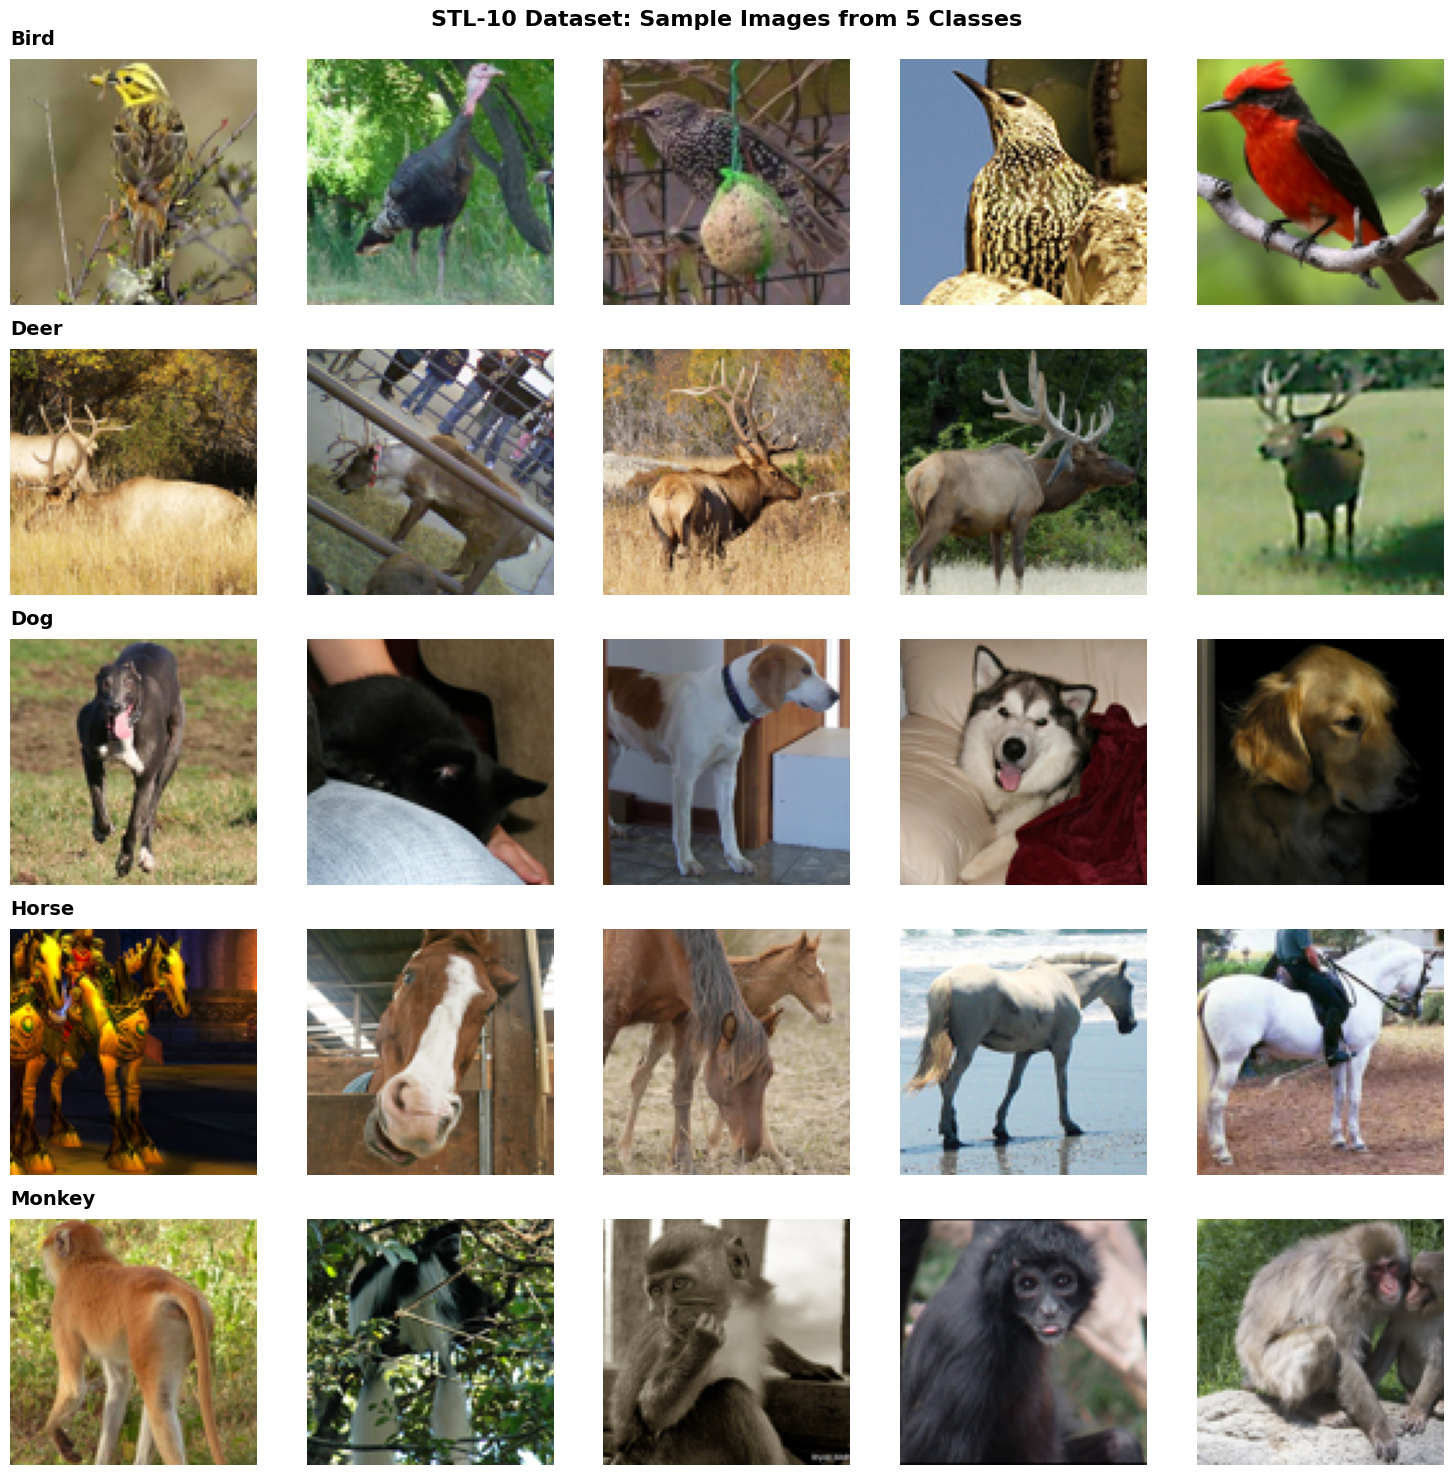


STL-10 DATASET VISUALIZATION SUMMARY
Number of classes visualized: 5
Samples per class: 5
Image dimensions: 96×96×3 (RGB)

Classes:
  1. Bird (label index: 1)
  2. Deer (label index: 4)
  3. Dog (label index: 5)
  4. Horse (label index: 6)
  5. Monkey (label index: 7)


In [19]:
# Define the class mapping for bird, deer, dog, horse, and monkey
class_mapping = {1: 'bird', 4: 'deer', 5: 'dog', 6: 'horse', 7: 'monkey'}

# Visualize STL-10 classes
visualise_stl10(class_mapping)

After visualizing the data, implement the `STL10_loader` class to create a custom data loader that initializes the dataset, extracts the target classes, and applies the necessary image transformations. Once these tasks are completed, you will move on to fine-tuning the ConvNet on this dataset in the next section.

In [20]:
class STL10_loader(Dataset):
    def __init__(self, root, train=True, transform=None):
        '''
        Initializes the STL10 dataset.

        Args:
            root (str): Root directory of the dataset.
            train (bool): If True, use the training set, otherwise use the test set.
            transform (callable, optional): A function/transform to apply to the images.
        '''

        self.transform = transform
        self.dataset = torchvision.datasets.STL10(root=root, split='train' if train else 'test', download=True)

    def __len__(self):
        '''
        Returns the number of samples in the dataset.
        '''

        return len(self.dataset)

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the transformed image and its target label.
        '''

        image, label = self.dataset[idx]
        if self.transform is not None:
            image = self.transform(image)
        return image, label

<a id="section-9"></a>
### **Section 9: Fine-tuning ConvNet on STL-10 (14 points)**

In this section, you will load the pre-trained parameters of the ConvNet (trained on CIFAR-100) and modify the output layer to adapt it to the new dataset containing 5 classes. You can either first load the pre-trained parameters and then modify the output layer, or change the output layer before loading the matched pre-trained parameters. Once modified, you will train the model and document the settings of hyperparameters, accuracy, and learning curve. Additionally, visualize both the training loss and accuracy to assess the learning process. To gain a deeper understanding of the feature learning process, consider using techniques like [**t-sne**](https://lvdmaaten.github.io/tsne/) for feature space visualization.

In [21]:
# calculate mean and std of STL10 dataset
import torch
import numpy
import torchvision.datasets as datasets
from torchvision import transforms

stl10_train_dataset = datasets.STL10(root='./data', split='train', download=True, transform=transforms.ToTensor())
stl10_test_dataset = datasets.STL10(root='./data', split='test', download=True, transform=transforms.ToTensor())

imgs_train = [item[0] for item in stl10_train_dataset]
imgs_test = [item[0] for item in stl10_test_dataset]
imgs_train = torch.stack(imgs_train, dim=0).numpy()
imgs_test = torch.stack(imgs_test, dim=0).numpy()

print('\ntrain mean and std calculation:')
# calculate mean over each channel (r,g,b)
mean_r_train = imgs_train[:,0,:,:].mean()
mean_g_train = imgs_train[:,1,:,:].mean()
mean_b_train = imgs_train[:,2,:,:].mean()
print(mean_r_train,mean_g_train,mean_b_train)

# calculate std over each channel (r,g,b)
std_r_train = imgs_train[:,0,:,:].std()
std_g_train = imgs_train[:,1,:,:].std()
std_b_train = imgs_train[:,2,:,:].std()
print(std_r_train,std_g_train,std_b_train)

print('\ntest mean and std calculation:')
# calculate mean over each channel (r,g,b)
mean_r_test = imgs_test[:,0,:,:].mean()
mean_g_test = imgs_test[:,1,:,:].mean()
mean_b_test = imgs_test[:,2,:,:].mean()
print(mean_r_test,mean_g_test,mean_b_test)

# calculate std over each channel (r,g,b)
std_r_test = imgs_test[:,0,:,:].std()
std_g_test = imgs_test[:,1,:,:].std()
std_b_test = imgs_test[:,2,:,:].std()
print(std_r_test,std_g_test,std_b_test)

Files already downloaded and verified
Files already downloaded and verified

train mean and std calculation:
0.44671047 0.43981034 0.40664658
0.26034108 0.25657734 0.27126735

test mean and std calculation:
0.44723067 0.43964198 0.4049562
0.26056474 0.25666168 0.26997396


Files already downloaded and verified
Files already downloaded and verified
Loading hyperparameters from: optuna_studies\extendedconvnet_20251016_201838.pkl
  Best validation accuracy: 48.99%
  Best parameters: {'lr': 0.0010436570509116535, 'weight_decay': 0.0004038749088599552, 'optimizer_type': 'adam', 'scheduler_type': 'cosine', 'batch_size': 256, 'fc_mid': 192, 'dropout': 0.33333794333085626, 'dropout2d': 0.12267918801224734}


C:\Users\jonas\AppData\Local\Temp\ipykernel_29860\1851368600.py:50: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=devic

Epoch [01/10] | Train loss: 1.4455 | Train acc: 38.80% | Val loss: 1.1769 | Val acc: 51.00%
Epoch [02/10] | Train loss: 0.9503 | Train acc: 64.85% | Val loss: 1.1041 | Val acc: 59.00%
Epoch [03/10] | Train loss: 0.7332 | Train acc: 72.70% | Val loss: 0.9598 | Val acc: 63.20%
Epoch [04/10] | Train loss: 0.5484 | Train acc: 81.65% | Val loss: 0.9626 | Val acc: 61.60%
Epoch [05/10] | Train loss: 0.3907 | Train acc: 87.55% | Val loss: 0.9922 | Val acc: 62.60%
Epoch [06/10] | Train loss: 0.2725 | Train acc: 92.35% | Val loss: 1.0040 | Val acc: 63.60%
Epoch [07/10] | Train loss: 0.1889 | Train acc: 95.15% | Val loss: 1.0208 | Val acc: 62.60%
Epoch [08/10] | Train loss: 0.1231 | Train acc: 97.20% | Val loss: 1.1502 | Val acc: 62.00%
Epoch [09/10] | Train loss: 0.1078 | Train acc: 96.80% | Val loss: 1.1915 | Val acc: 63.20%
Epoch [10/10] | Train loss: 0.0848 | Train acc: 97.75% | Val loss: 1.2384 | Val acc: 62.80%

STL-10 EVALUATION RESULTS (Section 9)
Test loss: 1.2839
Test accuracy: 62.75%
T

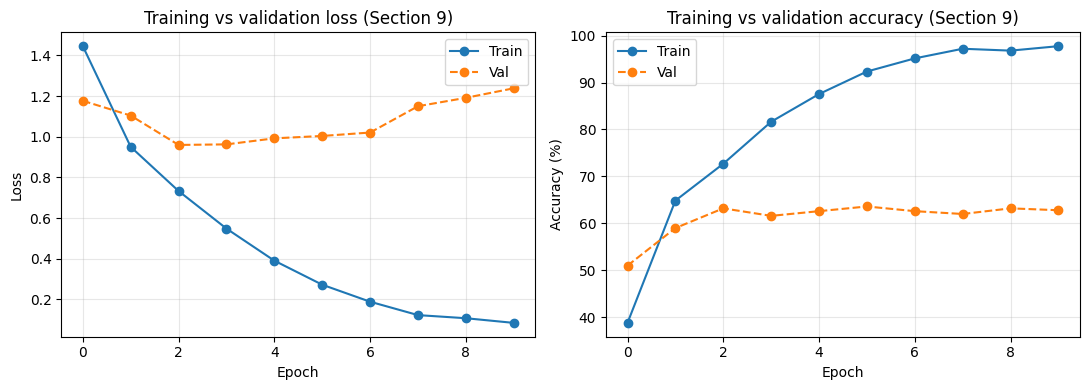


Running t-SNE on pooled conv features...


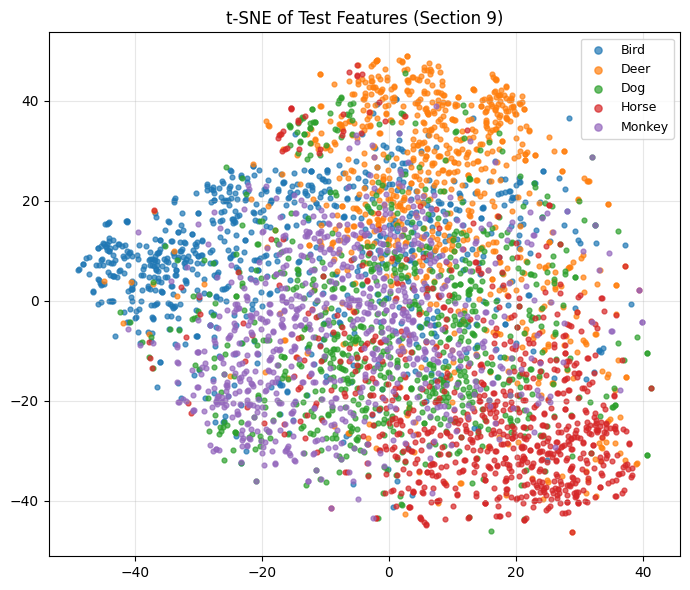

In [23]:
# extra import for t-sne visualization and random validation split
from sklearn.manifold import TSNE
from torch.utils.data import random_split

# make the code reproducible
SEED = 42
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
_gen = torch.Generator().manual_seed(SEED)

# load the stl10 dataset with the correct transforms (mean and std found above)
transform_train = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize((0.44671047, 0.43981034, 0.40664658), (0.26034108, 0.25657734, 0.27126735))
])
transform_test = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize((0.44723067, 0.43964198, 0.4049562), (0.26056474, 0.25666168, 0.26997396))
])
train_dataset = STL10_loader(root='./data', train=True,  transform=transform_train)
test_dataset  = STL10_loader(root='./data', train=False, transform=transform_test)

# keep only the specified classes in class_mapping (1,4,5,6,7)
filtered_train_dataset = [(img, label) for img, label in train_dataset if label in class_mapping]
filtered_test_dataset  = [(img, label) for img, label in test_dataset  if label in class_mapping]

# remap the labels to 0-4
label_to_new = {old_label: new_label for new_label, old_label in enumerate(class_mapping.keys())}
filtered_train_dataset = [(img, label_to_new[label]) for img, label in filtered_train_dataset]
filtered_test_dataset  = [(img, label_to_new[label])  for img, label in filtered_test_dataset]

# get a random validation split
val_ratio = 0.2
num_train = len(filtered_train_dataset)
num_val = int(num_train * val_ratio)
num_train_final = num_train - num_val
filtered_train_dataset, val_dataset = random_split(filtered_train_dataset, [num_train_final, num_val], generator=_gen)

# load the parameters of the best convnet model
model_name = 'ExtendedConvNet'
checkpoint_path = os.path.join(CHECKPOINT_DIR, "extendedconvnet_final_best.pth")
best_params, best_val_acc = load_best_params_from_study(model_name, OPTUNA_DIR)

# build the model from the best parameters
model = build_model_from_params(model_name, best_params)
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state'])

# modify the final layer so it has 5 output classes
num_classes = len(class_mapping)
in_features = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(in_features, num_classes)
model.to(device)
model.eval()

# parameters for the model training (best found hyperparameters)
BATCH_SIZE = best_params.get('batch_size', 256)
LR         = best_params.get('lr', 0.0010436570509116535)
WEIGHT_DECAY= best_params.get('weight_decay', 0.0004038749088599552)
EPOCHS     = 10

train_loader = DataLoader(
    filtered_train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4,
    generator=_gen
)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)
test_loader = DataLoader(filtered_test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
criterion = nn.CrossEntropyLoss()

# create lists to store training and validation history
history_loss = []
history_acc  = []
history_val_loss = []
history_val_acc  = []

# the training loop to train the model and store the process
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total, correct, loss_sum = 0, 0, 0.0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad(set_to_none=True)
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            preds = outputs.argmax(1)
            bs = labels.size(0)
            total += bs
            correct += (preds == labels).sum().item()
            loss_sum += loss.item() * bs
    return loss_sum / total, 100.0 * correct / total

t0 = time.time()
for epoch in range(1, EPOCHS+1):
    epoch_loss, epoch_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    history_loss.append(epoch_loss)
    history_acc.append(epoch_acc)

    epoch_val_loss, epoch_val_acc = validate(model, val_loader, criterion)
    history_val_loss.append(epoch_val_loss)
    history_val_acc.append(epoch_val_acc)

    print(f"Epoch [{epoch:02d}/{EPOCHS}] | Train loss: {epoch_loss:.4f} | Train acc: {epoch_acc:.2f}% | Val loss: {epoch_val_loss:.4f} | Val acc: {epoch_val_acc:.2f}%")
    train_time = time.time() - t0

# Evaluation on the test set
test_loss, test_acc = validate(model, test_loader, criterion)
print("\n" + "="*60)
print("STL-10 EVALUATION RESULTS (Section 9)")
print("="*60)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.2f}%")
print(f"Training time: {train_time/60:.2f} min")

# plot the training loss and accuracy curves
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.plot(history_loss, marker='o', label='Train')
plt.plot(history_val_loss, marker='o', linestyle='--', label='Val')
plt.title("Training vs validation loss (Section 9)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(alpha=0.3)
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_acc, marker='o', label='Train')
plt.plot(history_val_acc, marker='o', linestyle='--', label='Val')
plt.title("Training vs validation accuracy (Section 9)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# do a t-sne visualization of the learned features
@torch.no_grad()
def extract_conv_features(model, loader, device, max_samples=1500):
    """
    Grab features right after the global average pooling (before the final linear).
    """
    model.eval()
    feats = []
    labels = []
    seen = 0
    for x, y in loader:
        x = x.to(device)
        f = model.features(x)
        f = f.view(f.size(0), -1)
        feats.append(f.cpu())
        labels.append(y)
        seen += x.size(0)
        if seen >= max_samples:
            break
    feats  = torch.cat(feats,  dim=0).numpy()
    labels = torch.cat(labels, dim=0).numpy()
    return feats, labels

# use only the test set for t-sne
feats, y = extract_conv_features(model, test_loader, device, max_samples=4000)

print("\nRunning t-SNE on pooled conv features...")
tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='pca', random_state=SEED)
Z = tsne.fit_transform(feats)

# plot the t-sne results
inv_map = {v:k for k, v in label_to_new.items()}
name_map = {new: class_mapping[orig] for new, orig in inv_map.items()}

plt.figure(figsize=(7,6))
for c in np.unique(y):
    sel = (y == c)
    plt.scatter(Z[sel,0], Z[sel,1], s=12, alpha=0.7, label=name_map[int(c)].capitalize())
plt.title("t-SNE of Test Features (Section 9)")
plt.legend(markerscale=1.5, fontsize=9)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<a id="section-10"></a>
### **Section 10: Bonus Challenge (optional)**

Try to achieve the highest possible accuracy on the test dataset (5 classes from STL-10) by adjusting hyperparameters, modifying architectures, or applying techniques like data augmentation. The top-performing teams will earn bonus points that can significantly boost their final lab grade, even allowing it to exceed 10 (up to 11):

- **1st place:** +1.0 to the final grade of the final lab
- **2nd place:** +0.8 to the final grade of the final lab
- **3rd place:** +0.6 to the final grade of the final lab
- **4th place:** +0.4 to the final grade of the final lab
- **5th place:** +0.2 to the final grade of the final lab

**Hint:** You may use techniques like data augmentation, freezing early layers, modifying architecture, or optimizing hyperparameters. Only data from CIFAR-100 and STL-10 can be used, and you cannot add more than 3 additional convolutional layers.

Files already downloaded and verified
Files already downloaded and verified
Loading hyperparameters from: optuna_studies\extendedconvnet_20251016_201838.pkl
  Best validation accuracy: 48.99%
  Best parameters: {'lr': 0.0010436570509116535, 'weight_decay': 0.0004038749088599552, 'optimizer_type': 'adam', 'scheduler_type': 'cosine', 'batch_size': 256, 'fc_mid': 192, 'dropout': 0.33333794333085626, 'dropout2d': 0.12267918801224734}


C:\Users\jonas\AppData\Local\Temp\ipykernel_29860\1726174523.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=devic

Epoch [01/75] | Train Loss: 1.4331 | Train Acc: 39.20% | Val Loss: 1.2005 | Val Acc: 53.20%
Epoch [02/75] | Train Loss: 1.2249 | Train Acc: 53.60% | Val Loss: 1.1241 | Val Acc: 55.20%
Epoch [03/75] | Train Loss: 1.1047 | Train Acc: 57.85% | Val Loss: 1.0307 | Val Acc: 61.20%
Epoch [04/75] | Train Loss: 1.0482 | Train Acc: 59.30% | Val Loss: 0.9781 | Val Acc: 64.40%
Epoch [05/75] | Train Loss: 0.9547 | Train Acc: 63.90% | Val Loss: 0.9253 | Val Acc: 65.20%
Epoch [06/75] | Train Loss: 0.9306 | Train Acc: 64.70% | Val Loss: 0.9181 | Val Acc: 67.00%
Epoch [07/75] | Train Loss: 0.8972 | Train Acc: 64.55% | Val Loss: 0.8860 | Val Acc: 67.40%
Epoch [08/75] | Train Loss: 0.8603 | Train Acc: 67.95% | Val Loss: 0.9393 | Val Acc: 64.40%
Epoch [09/75] | Train Loss: 0.8179 | Train Acc: 68.95% | Val Loss: 0.8865 | Val Acc: 66.00%
Epoch [10/75] | Train Loss: 0.7940 | Train Acc: 69.75% | Val Loss: 0.8894 | Val Acc: 66.60%
Epoch [11/75] | Train Loss: 0.7715 | Train Acc: 71.45% | Val Loss: 0.8359 | Val 

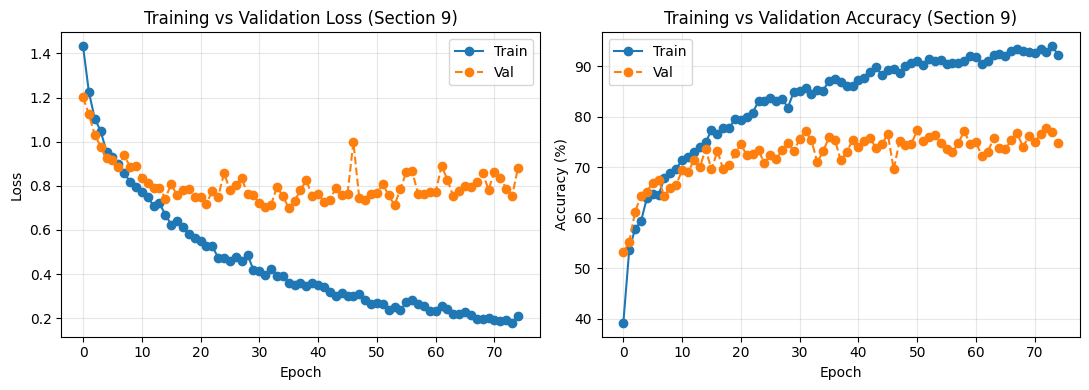


Running t-SNE on pooled conv features...


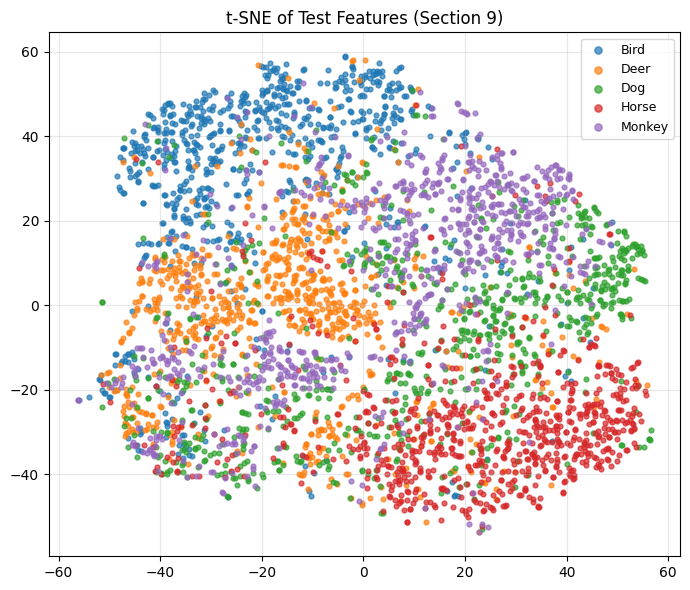

In [25]:
# extra import for t-sne visualization and random validation split
from sklearn.manifold import TSNE
from torch.utils.data import random_split

# make the code reproducible
SEED = 42
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
_gen = torch.Generator().manual_seed(SEED)

# load the stl10 dataset with the correct transforms (mean and std found above)
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.44671047, 0.43981034, 0.40664658), (0.26034108, 0.25657734, 0.27126735))
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.44723067, 0.43964198, 0.4049562), (0.26056474, 0.25666168, 0.26997396))
])
train_dataset = STL10_loader(root='./data', train=True,  transform=transform_train)
test_dataset  = STL10_loader(root='./data', train=False, transform=transform_test)

# keep only the specified classes in class_mapping (1,4,5,6,7)
filtered_train_dataset = [(img, label) for img, label in train_dataset if label in class_mapping]
filtered_test_dataset  = [(img, label) for img, label in test_dataset  if label in class_mapping]

# remap the labels to 0-4
label_to_new = {old_label: new_label for new_label, old_label in enumerate(class_mapping.keys())}
filtered_train_dataset = [(img, label_to_new[label]) for img, label in filtered_train_dataset]
filtered_test_dataset  = [(img, label_to_new[label])  for img, label in filtered_test_dataset]

# get a random validation split
val_ratio = 0.2
num_train = len(filtered_train_dataset)
num_val = int(num_train * val_ratio)
num_train_final = num_train - num_val
filtered_train_dataset, val_dataset = random_split(filtered_train_dataset, [num_train_final, num_val], generator=_gen)

# load the parameters of the best convnet model
model_name = 'ExtendedConvNet'
checkpoint_path = os.path.join(CHECKPOINT_DIR, "extendedconvnet_final_best.pth")
best_params, best_val_acc = load_best_params_from_study(model_name, OPTUNA_DIR)

# build the model from the best parameters
model = build_model_from_params(model_name, best_params)
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state'])

# ensure that the model can handle the different image size
if not any(isinstance(m, nn.AdaptiveAvgPool2d) for m in model.features):
    model.features = nn.Sequential(
        *list(model.features),
        nn.AdaptiveAvgPool2d(1)
    )

# modify the final layer so it has 5 output classes
num_classes = len(class_mapping)
in_features = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(in_features, num_classes)
model.to(device)
model.eval()

# parameters for the model training (best found hyperparameters)
BATCH_SIZE = best_params.get('batch_size', 256)
LR         = best_params.get('lr', 0.0010436570509116535)
WEIGHT_DECAY= best_params.get('weight_decay', 0.0004038749088599552)
EPOCHS     = 75

train_loader = DataLoader(
    filtered_train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4,
    generator=_gen
)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)
test_loader = DataLoader(filtered_test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
criterion = nn.CrossEntropyLoss()

# create lists to store training and validation history
history_loss = []
history_acc  = []
history_val_loss = []
history_val_acc  = []

# the training loop to train the model and store the process
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total, correct, loss_sum = 0, 0, 0.0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad(set_to_none=True)
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            preds = outputs.argmax(1)
            bs = labels.size(0)
            total += bs
            correct += (preds == labels).sum().item()
            loss_sum += loss.item() * bs
    return loss_sum / total, 100.0 * correct / total

t0 = time.time()
for epoch in range(1, EPOCHS+1):
    epoch_loss, epoch_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    history_loss.append(epoch_loss)
    history_acc.append(epoch_acc)

    epoch_val_loss, epoch_val_acc = validate(model, val_loader, criterion)
    history_val_loss.append(epoch_val_loss)
    history_val_acc.append(epoch_val_acc)

    print(f"Epoch [{epoch:02d}/{EPOCHS}] | Train Loss: {epoch_loss:.4f} | Train Acc: {epoch_acc:.2f}% | Val Loss: {epoch_val_loss:.4f} | Val Acc: {epoch_val_acc:.2f}%")
    train_time = time.time() - t0

# Evaluation on the test set
test_loss, test_acc = validate(model, test_loader, criterion)
print("\n" + "="*60)
print("STL-10 EVALUATION RESULTS (Section 9)")
print("="*60)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.2f}%")
print(f"Training time: {train_time/60:.2f} min")

# plot the training loss and accuracy curves
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.plot(history_loss, marker='o', label='Train')
plt.plot(history_val_loss, marker='o', linestyle='--', label='Val')
plt.title("Training vs Validation Loss (Section 9)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(alpha=0.3)
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_acc, marker='o', label='Train')
plt.plot(history_val_acc, marker='o', linestyle='--', label='Val')
plt.title("Training vs Validation Accuracy (Section 9)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# do a t-sne visualization of the learned features
@torch.no_grad()
def extract_conv_features(model, loader, device, max_samples=1500):
    """
    Grab features right after the global average pooling (before the final linear).
    """
    model.eval()
    feats = []
    labels = []
    seen = 0
    for x, y in loader:
        x = x.to(device)
        f = model.features(x)
        f = f.view(f.size(0), -1)
        feats.append(f.cpu())
        labels.append(y)
        seen += x.size(0)
        if seen >= max_samples:
            break
    feats  = torch.cat(feats,  dim=0).numpy()
    labels = torch.cat(labels, dim=0).numpy()
    return feats, labels

# use only the test set for t-sne
feats, y = extract_conv_features(model, test_loader, device, max_samples=4000)

print("\nRunning t-SNE on pooled conv features...")
tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='pca', random_state=SEED)
Z = tsne.fit_transform(feats)

# plot the t-sne results
inv_map = {v:k for k, v in label_to_new.items()}
name_map = {new: class_mapping[orig] for new, orig in inv_map.items()}

plt.figure(figsize=(7,6))
for c in np.unique(y):
    sel = (y == c)
    plt.scatter(Z[sel,0], Z[sel,1], s=12, alpha=0.7, label=name_map[int(c)].capitalize())
plt.title("t-SNE of Test Features (Section 9)")
plt.legend(markerscale=1.5, fontsize=9)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<a id="section-x"></a>
### **Section X: Individual Contribution Report *(Mandatory)***

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.

| Name | Contribution on Research | Contribution on Programming | Contribution on Writing |
| -------- | ------- | ------- | ------- |
| Jonas Elzinga | 33.33333 % | 33.33333 % | 33.33333 % |
| May Daniel Ben Zion | 33.33333 % | 33.33333 % | 33.33333 % |
| Vlad Chibulcutean | 33.33333 % | 33.33333 % | 33.33333 % |
|  | - % | - % | - % |

### - End of Notebook -